In [1]:
import os

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

In [2]:
os.getcwd()

'c:\\Users\\erich\\Desktop\\HYU\\신용카드 고객 세그먼트 분류 공모전\\eda\\1.회원정보'

In [3]:
customers = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))

    customers.append(pd.read_parquet(f"../../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet"))

In [4]:
customers[0].columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

## 카드 수 관련 내용 정리.

### 유효카드수, 이용가능카드수, 이용카드수 분석
- `유효카드수_신용`을 보면, `A` Segment에서는 `유효카드수_신용`이 1또는 4에 몰려있고, 1~4가 전반적으로 고루 분포함. 하지만 `B`~`E`로 갈수록, `유효카드수_신용`은 1의 비율이 높아짐.
- `유효카드수_신용_가족`을 보면, `A`,`B`에서는 2의 비율이, `C`,`D`,`E`보다 매우 높음
- `유효카드수_체크`는 오히려 `A`,`E`가 비슷하고, `C`,`D`가 비슷
- `이용카드수_신용`를 보면, `A`,`B`가 비슷, `C`,`D`가 비슷, `E`가 조금 다른 경향을 볼 수 있음.
- `이용카드수_신용_가족`도 마찬가지로 차이가 좀 있음.

유효카드수 >= 이용가능카드수 >= 이용카드수를 만족할 것으로 추정

**(유효카드수 - 이용카드수)** 를 변수로 추가해서 관계를 봐도 좋을 듯
- 막상 보니까 모든 Segment에서 비슷하게 나타남.

### 사전 요약
- `상품관련면제카드수_BOM`은 모두가 0, 아무런 의미가 없음.
- `임직원면제카드수_BOM` 역시 모두가 0
- `우수회원면제카드수_BOM` 역시 모두가 0
- `기타면제카드수_BOM` 역시 모두가 0
- `카드신청건수`는 `Segment`별로 큰 차이가 없어보임. 이 역시 변수에서 제거해도 될 듯

## 정리
안 써도 될 것 같은 변수
- `상품관련면제카드수_BOM`, `임직원면제카드수_BOM`, `우수회원면제카드수_BOM`, `기타면제카드수_BOM`, `카드신청건수`, `체크카드` 관련 변수수

## 유효 카드 수

'유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',

### 사전 요약
- E 집단은, "유효카드수_신용"이 1개인 사람이 다른 집단에 비해 비율이 높음.
- 그리고 A, B는, "유효카드수_신용_가족"이 2개 이상인 사람의 비율이, 다른 세그먼트에 비해 높음.
- "유효카드수_체크_가족"은 아무 의미 없는 변수인 것으로 보임.

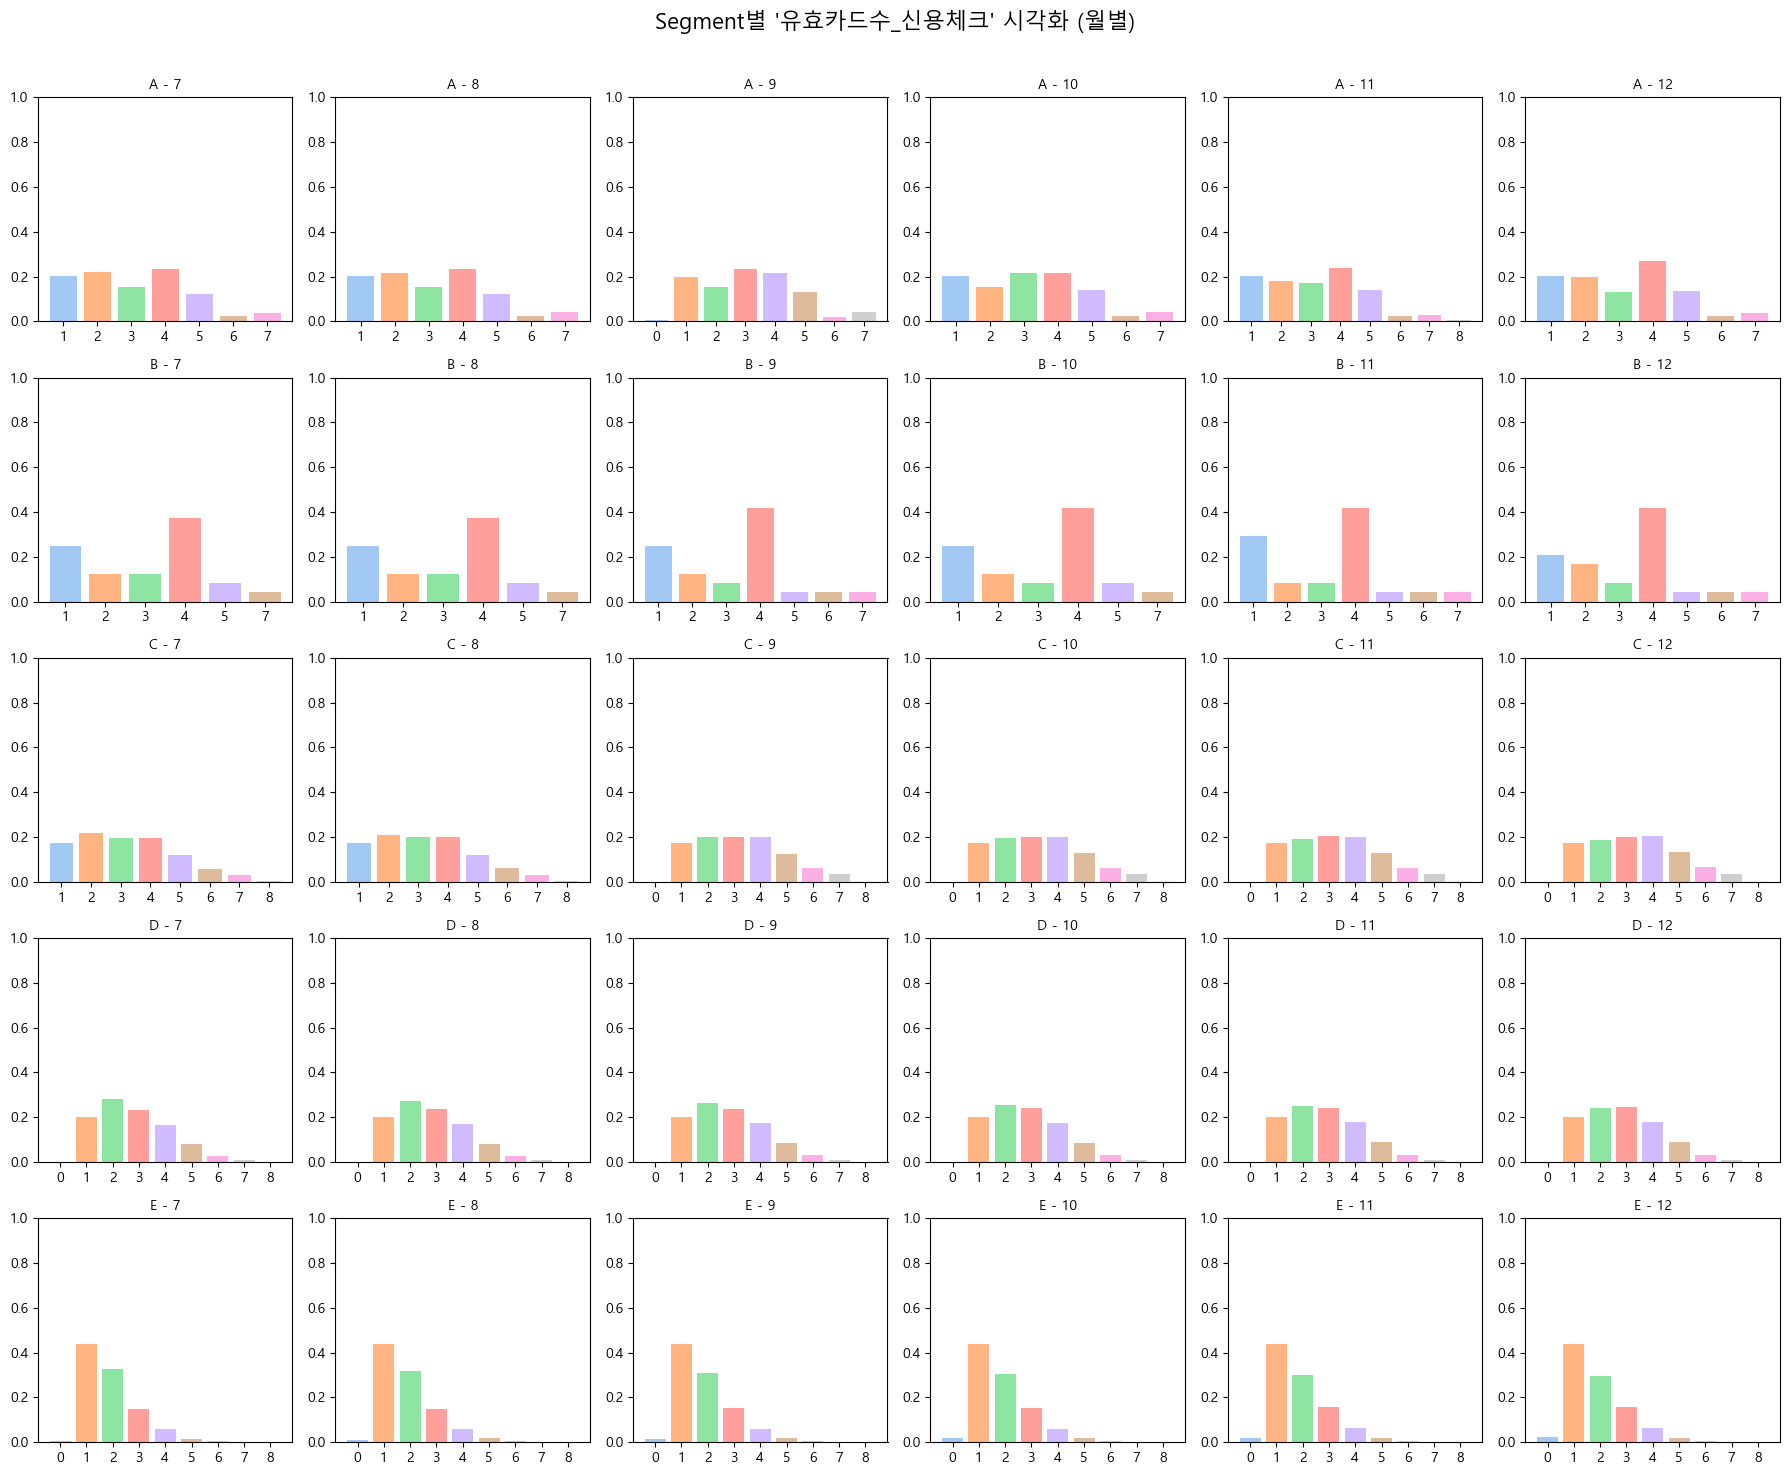

In [5]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수_신용체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

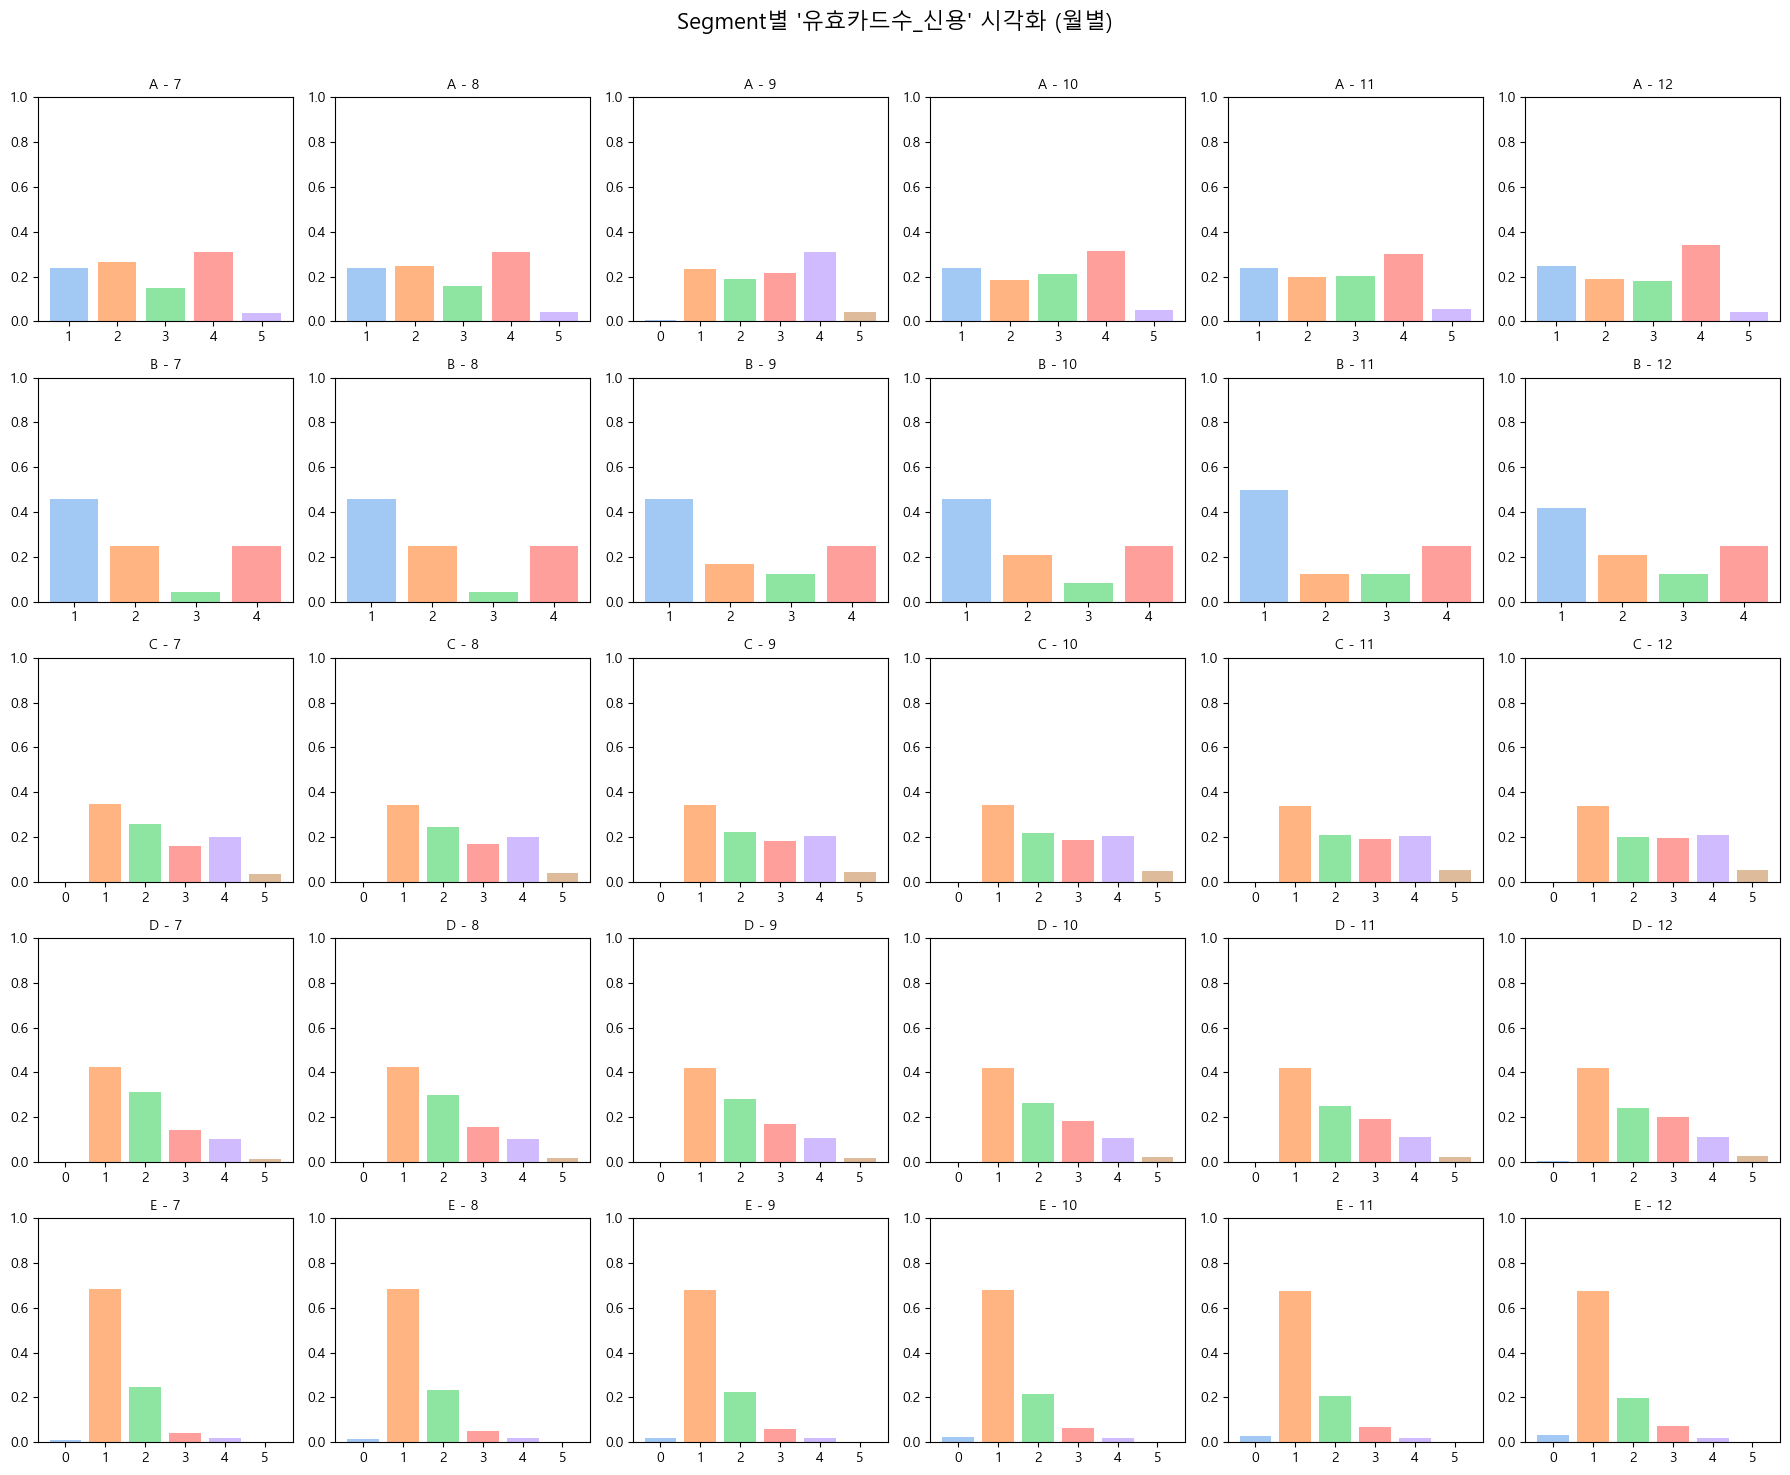

In [6]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수_신용",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

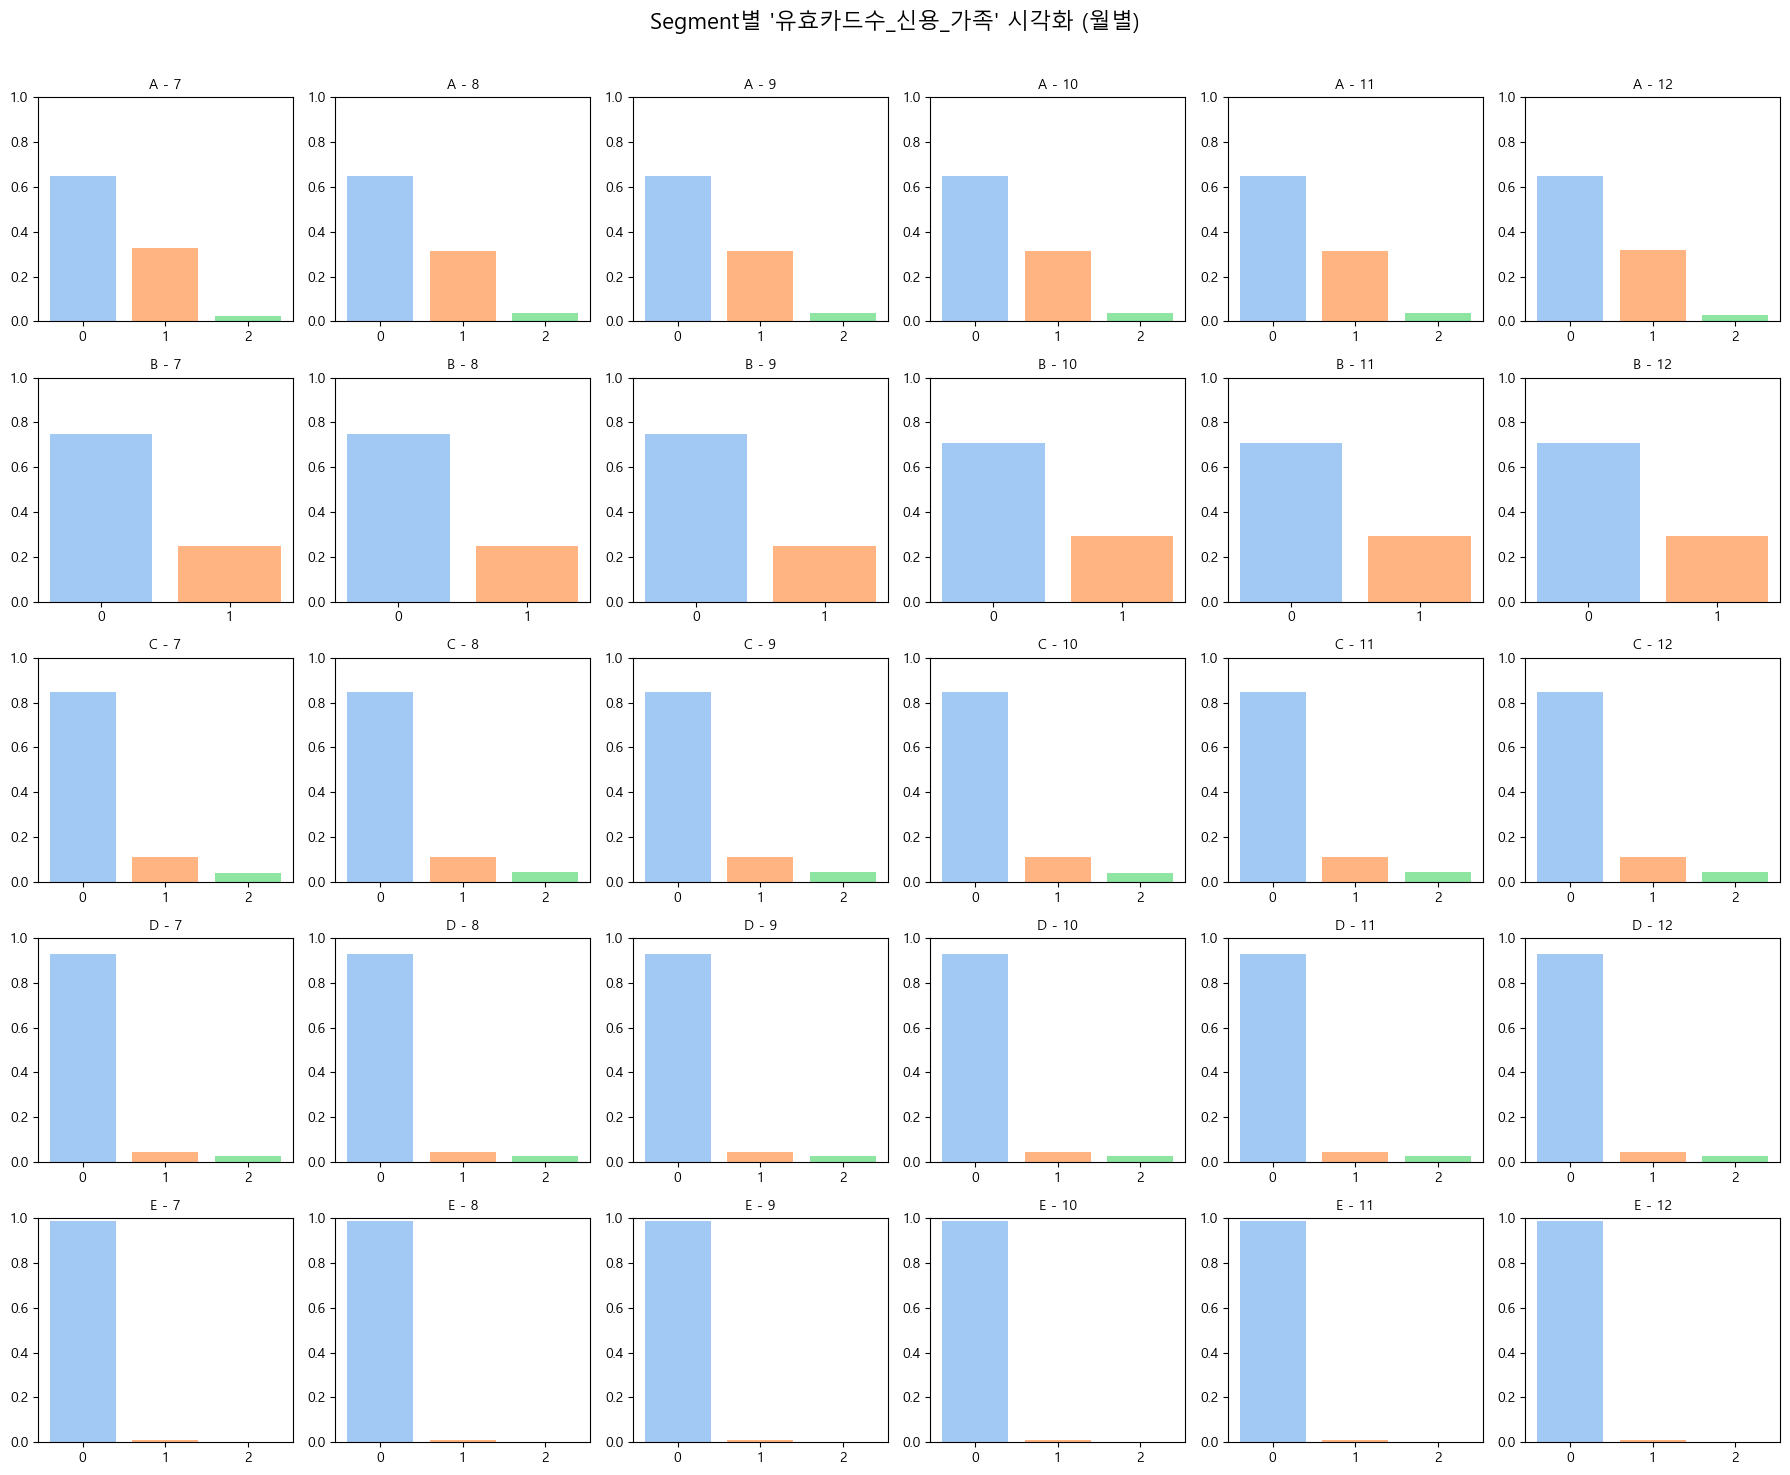

In [7]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수_신용_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

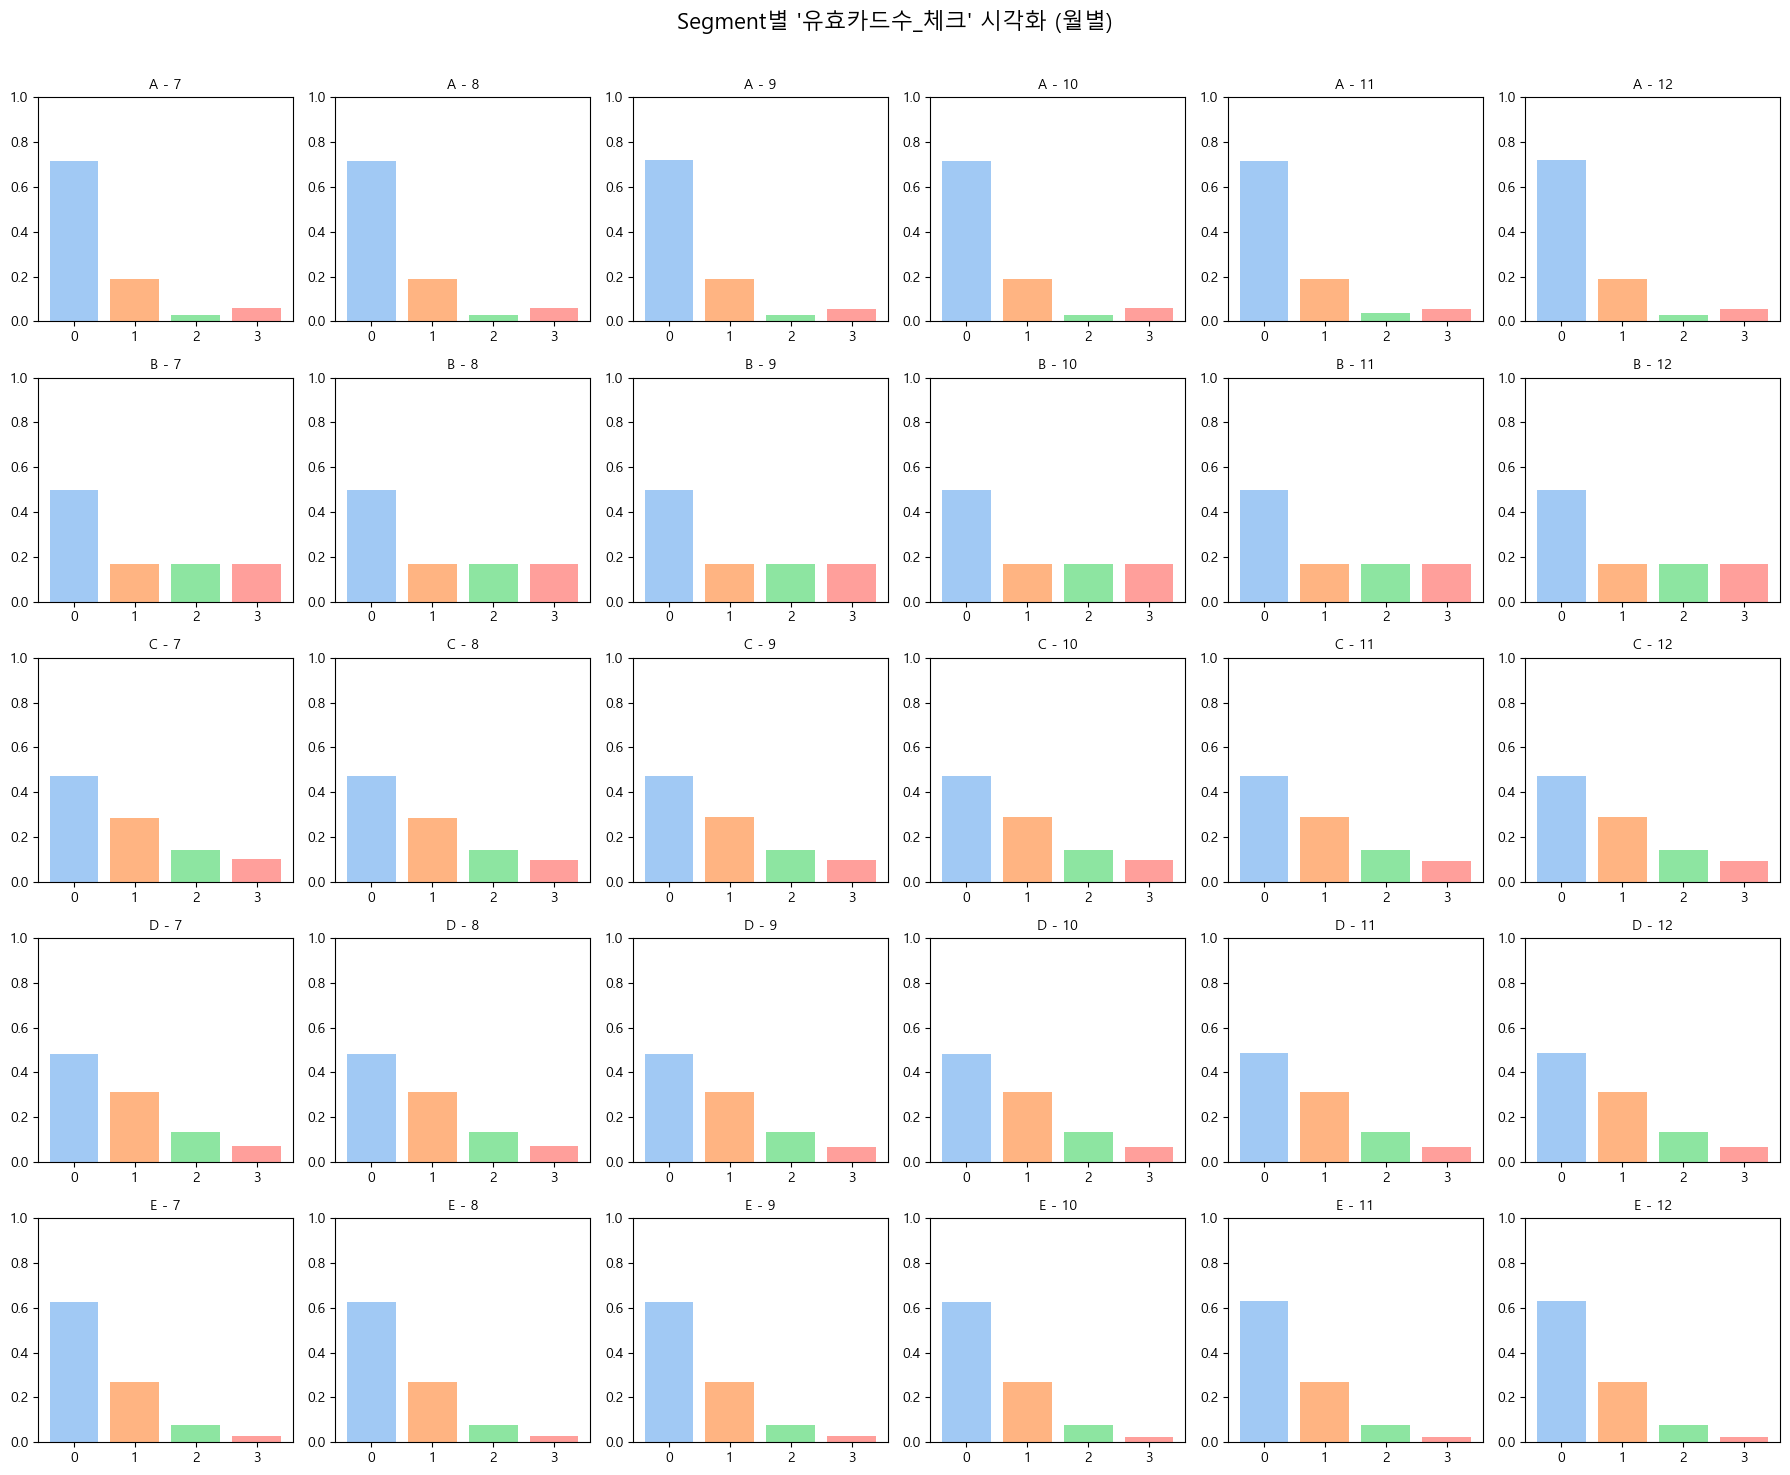

In [8]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수_체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

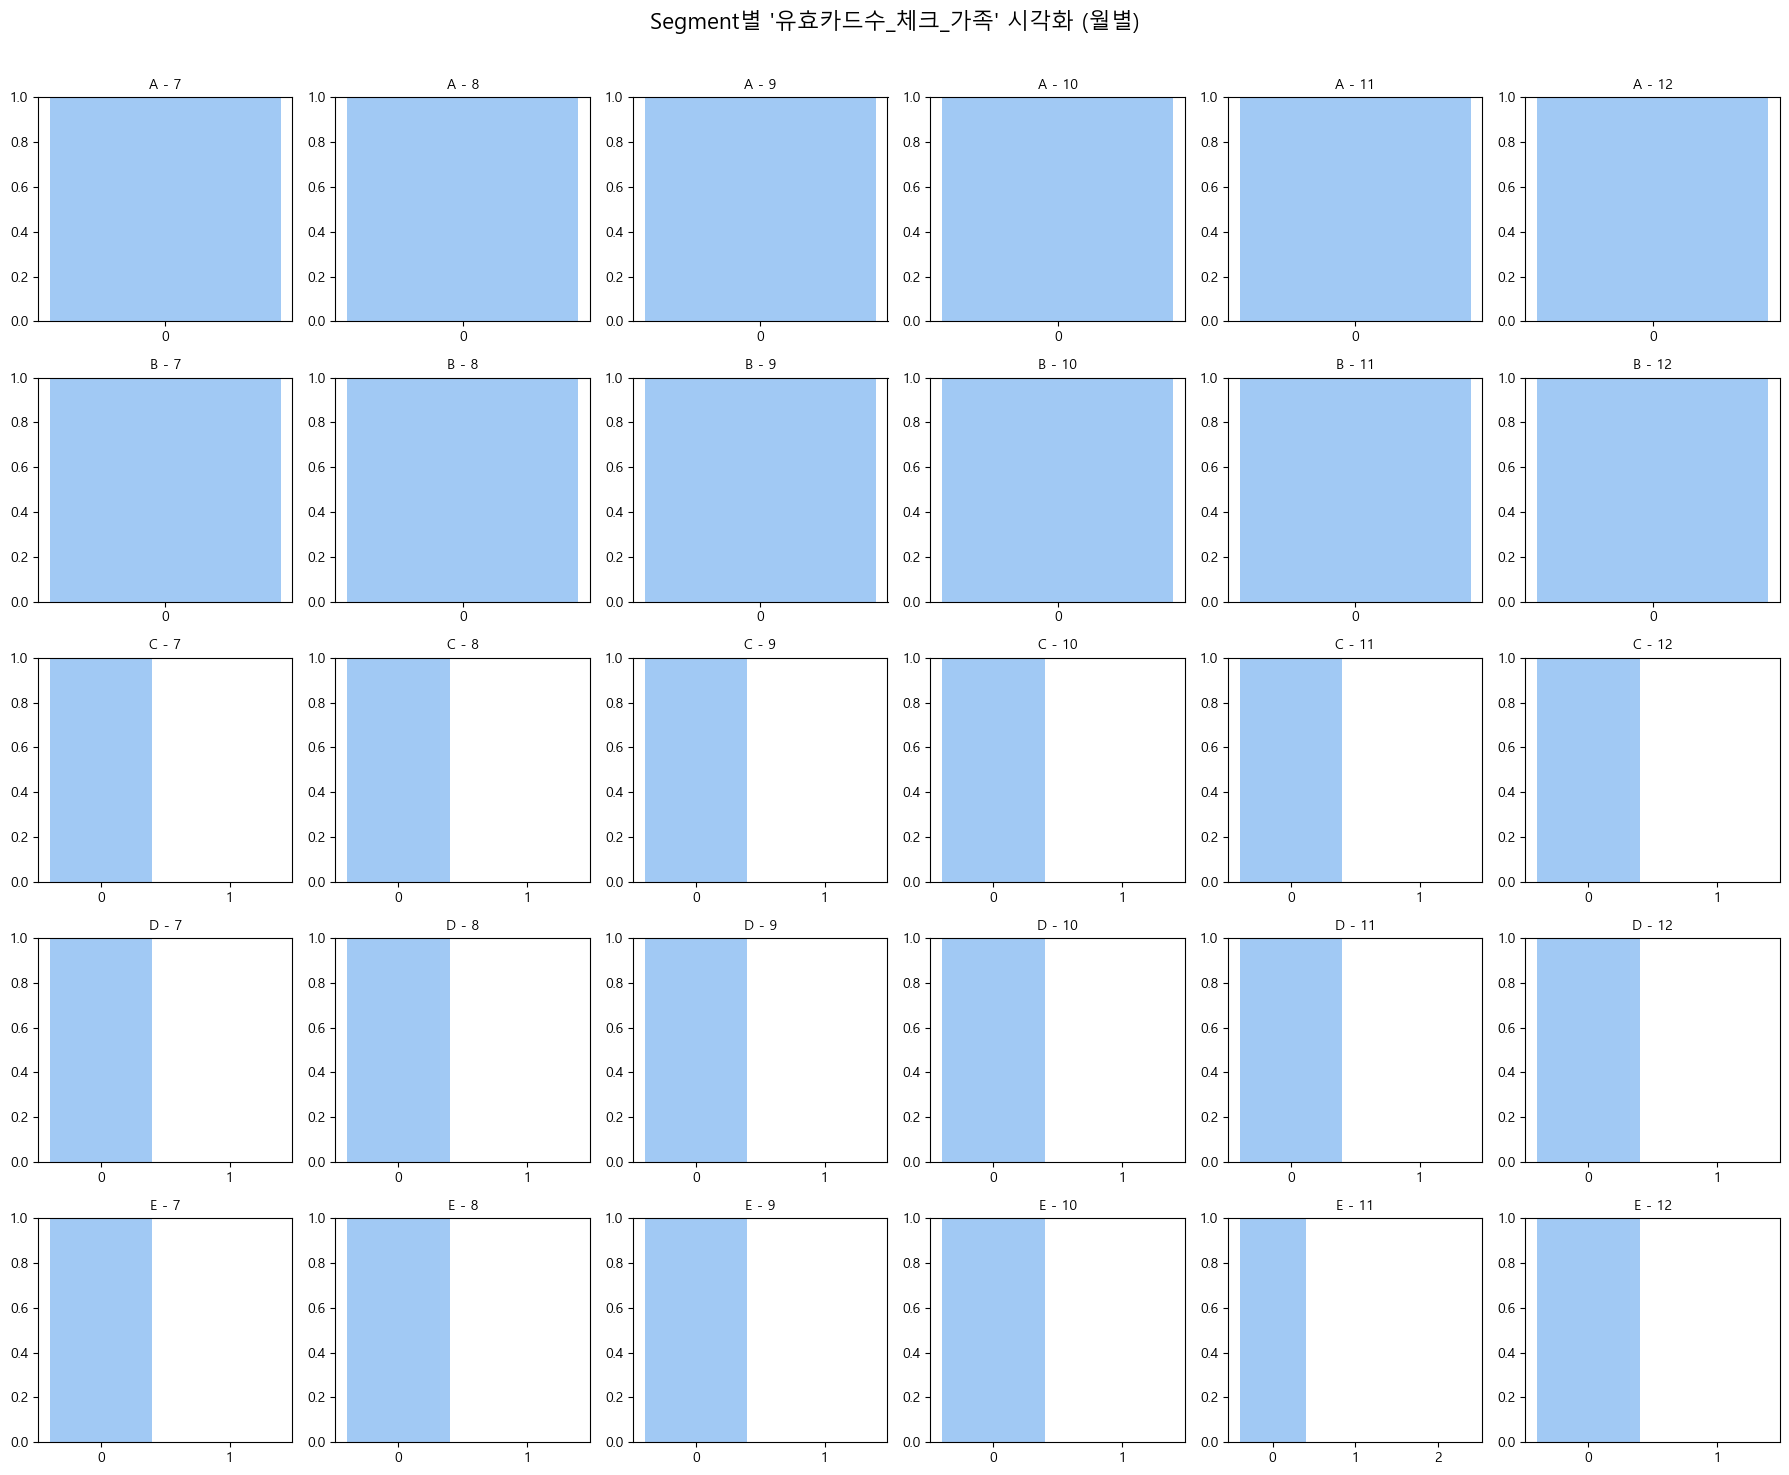

In [9]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수_체크_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

## 이용가능 카드 수

'이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족'

### 이용가능카드수 == 유효카드수?

In [10]:
유효카드 = ['유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족']
이용가능카드 = ['이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족']
이용카드 = ['이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족']

months = [7, 8, 9, 10, 11, 12]

for a, b in zip(유효카드, 이용가능카드):
    for month in months:
        if customers[month - 7][a].equals(customers[month - 7][b]):
            print(f"{month:2d}의 {a}, {b}는 같습니다.")

프린트된 결과물이 없으니까, 둘이 서로 다르다는 것을 알 수 있음.

한 사람의 이용가능카드수와, 유효카드수가 어떻게 다른지 확인해야할 것 같음.

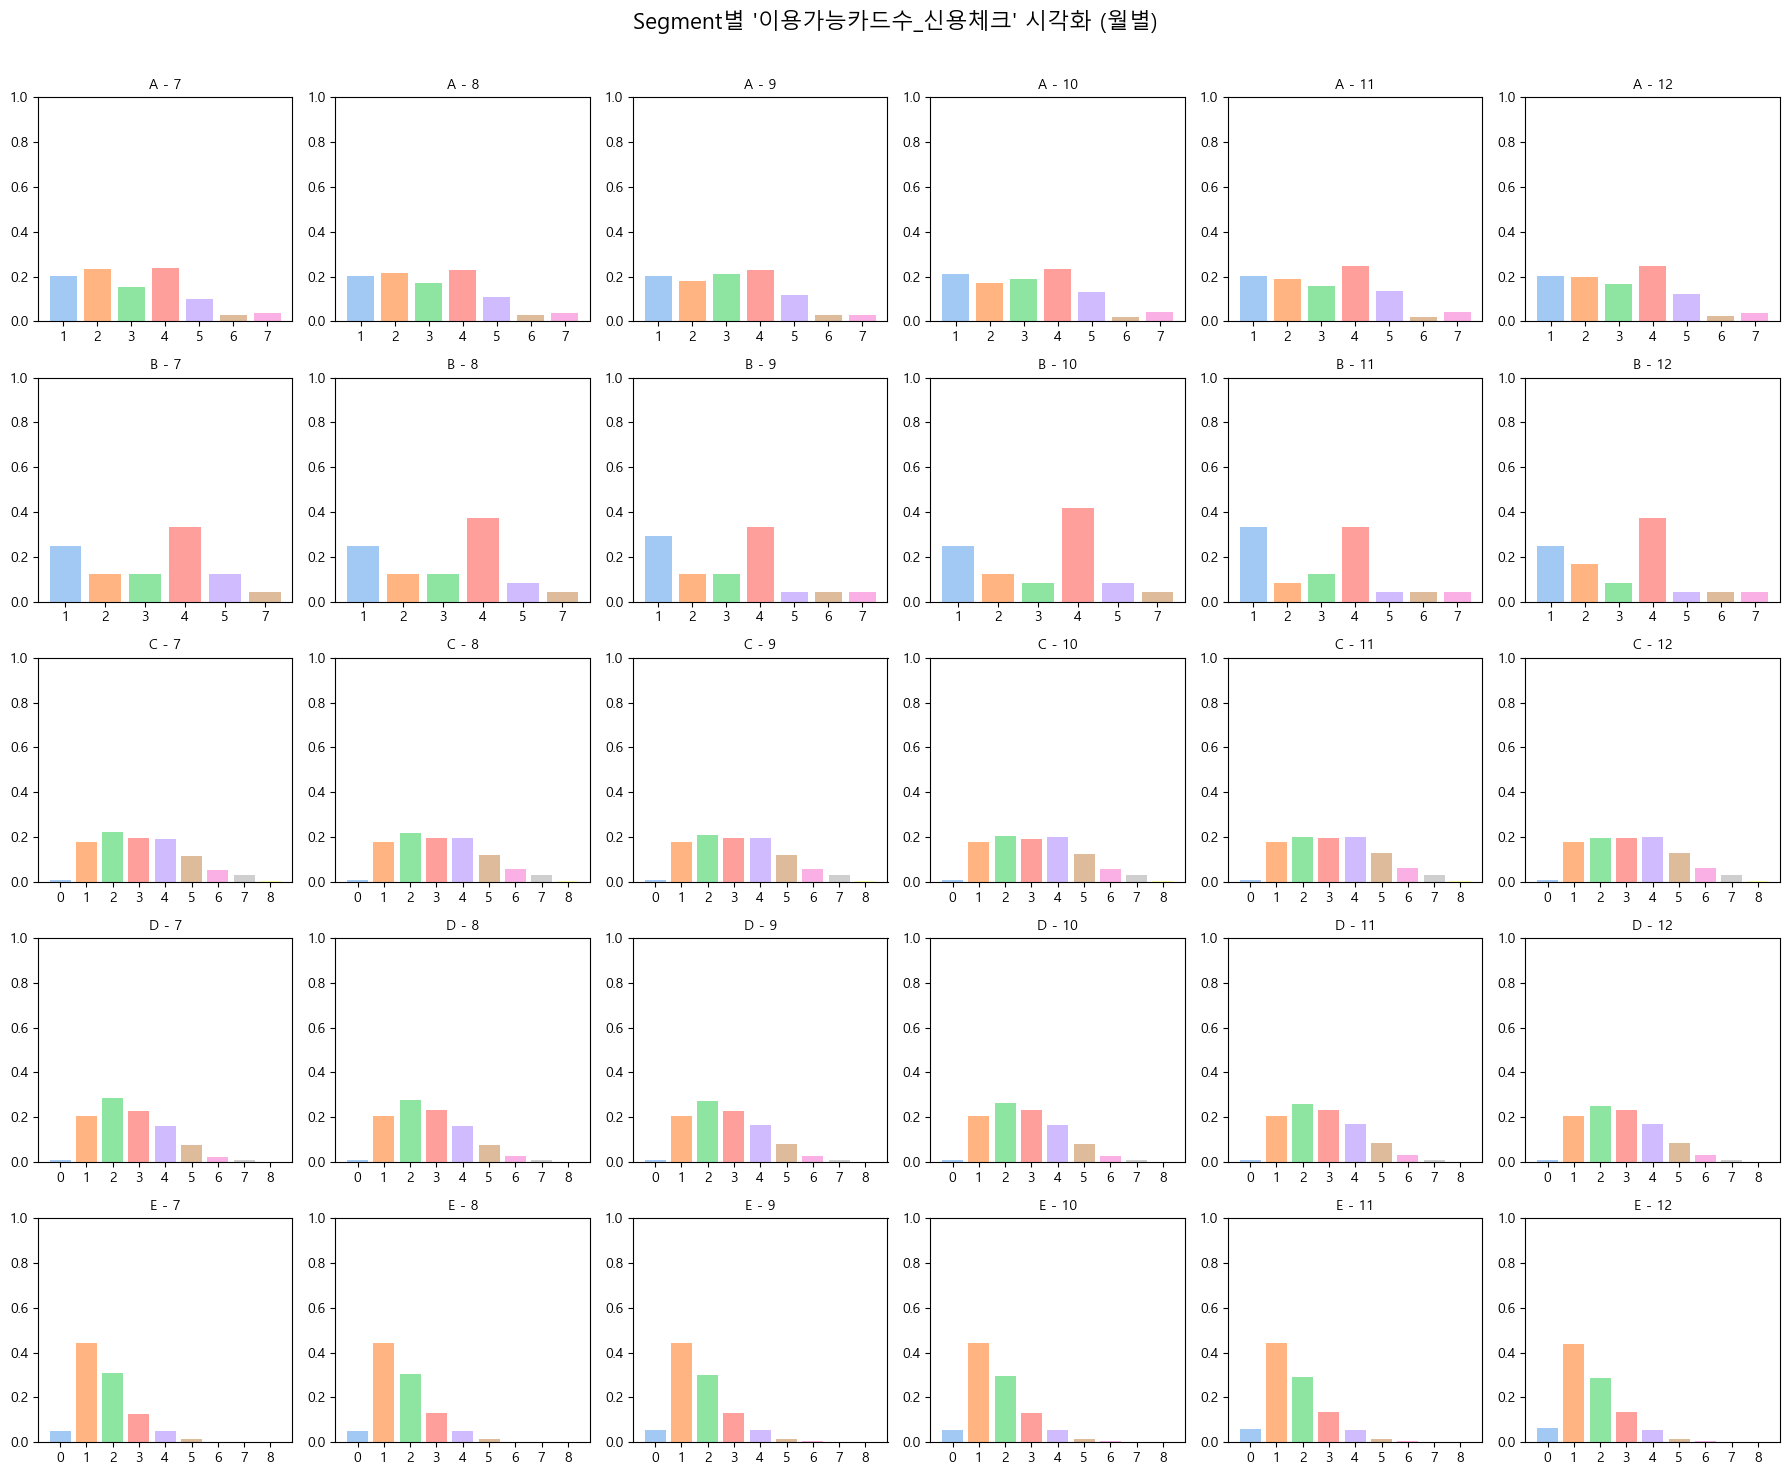

In [11]:
plot_segment_grid(dfs = customers,
                  col = "이용가능카드수_신용체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

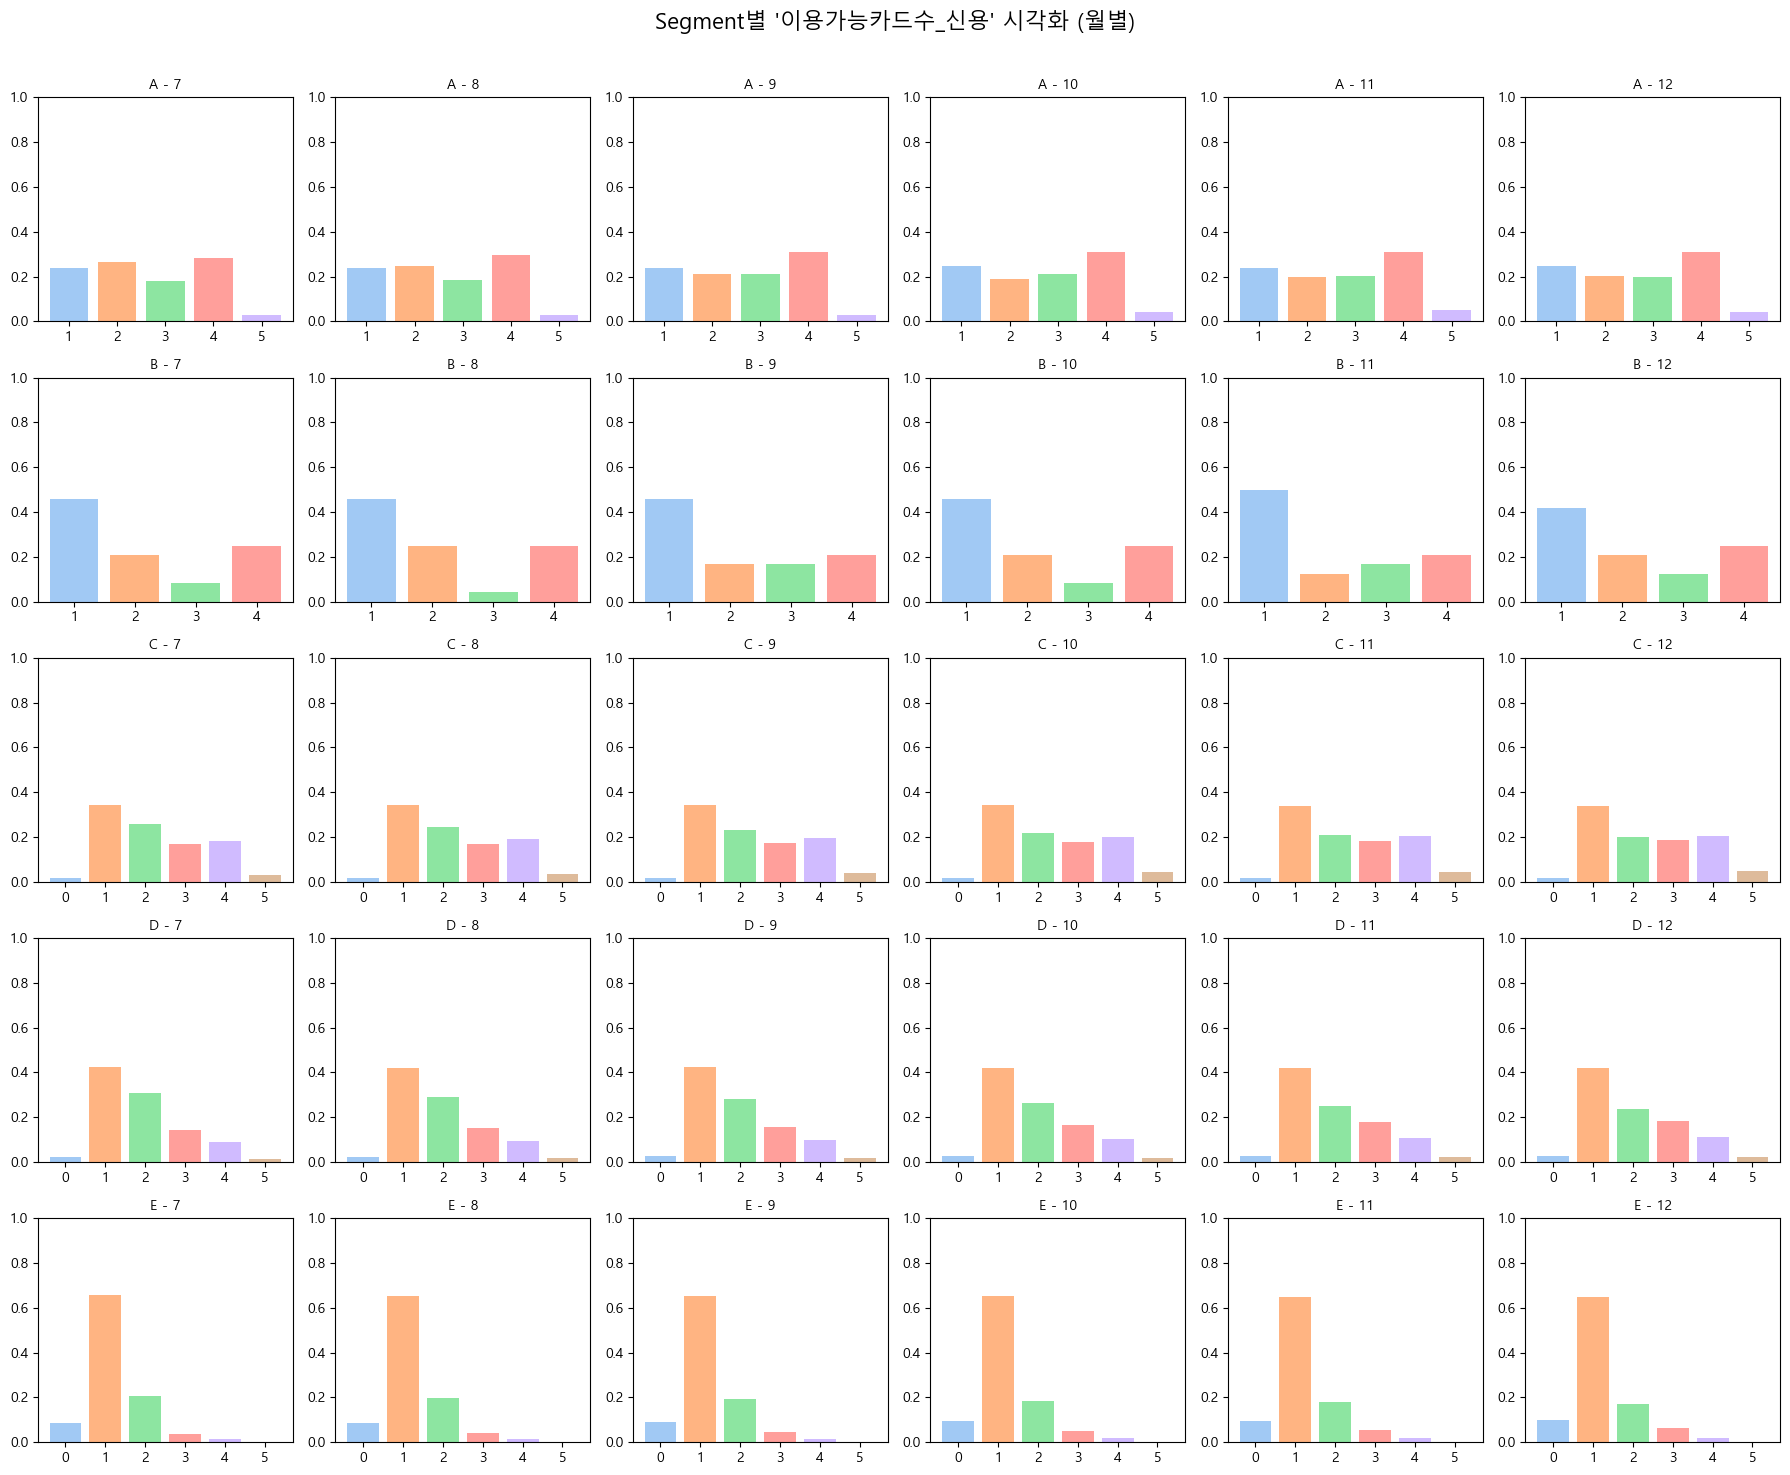

In [12]:
plot_segment_grid(dfs = customers,
                  col = "이용가능카드수_신용",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

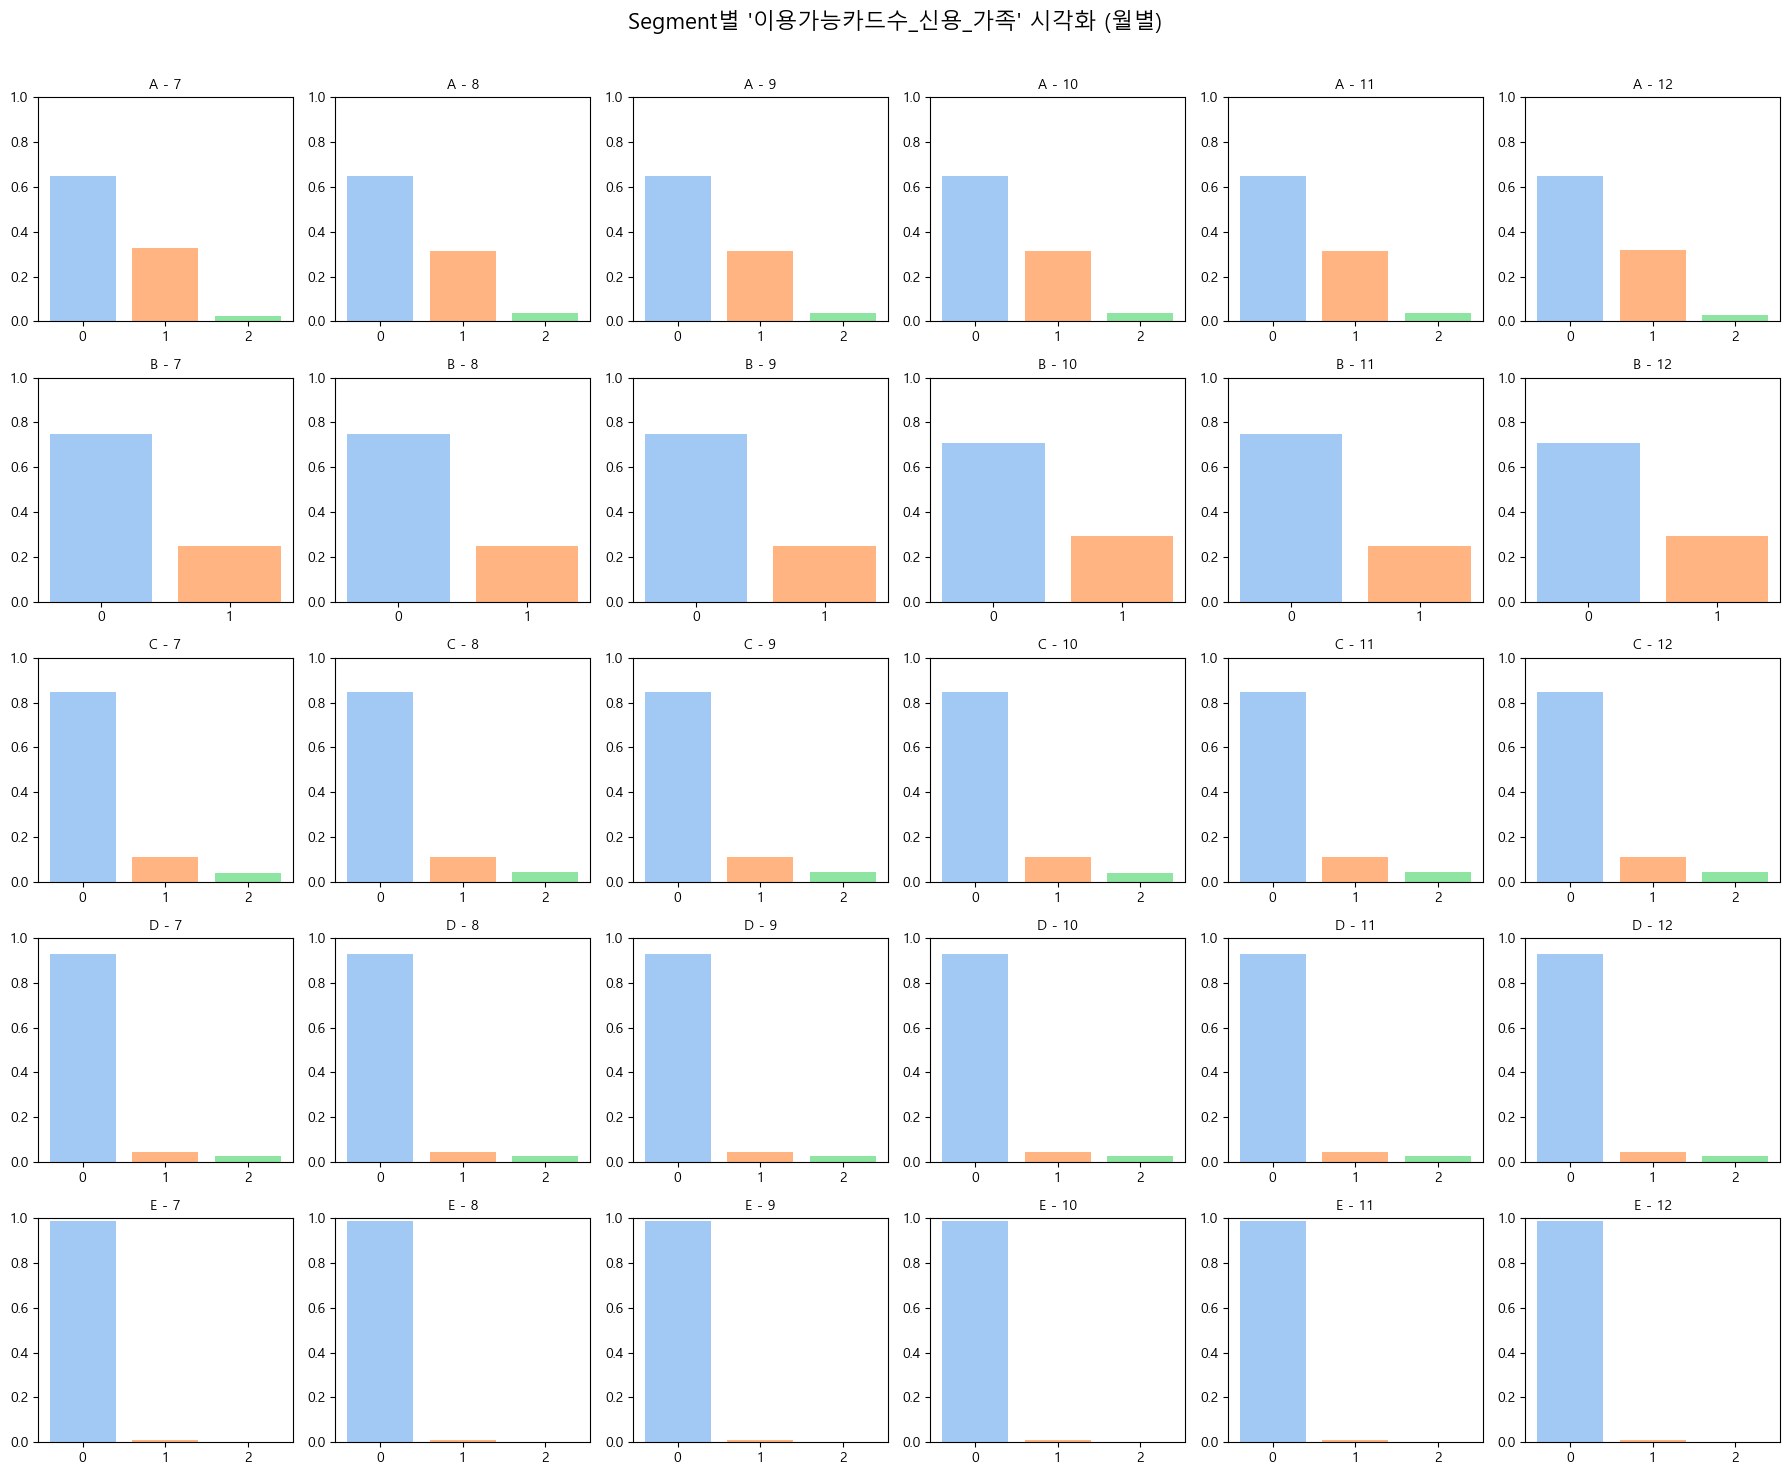

In [13]:
plot_segment_grid(dfs = customers,
                  col = "이용가능카드수_신용_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

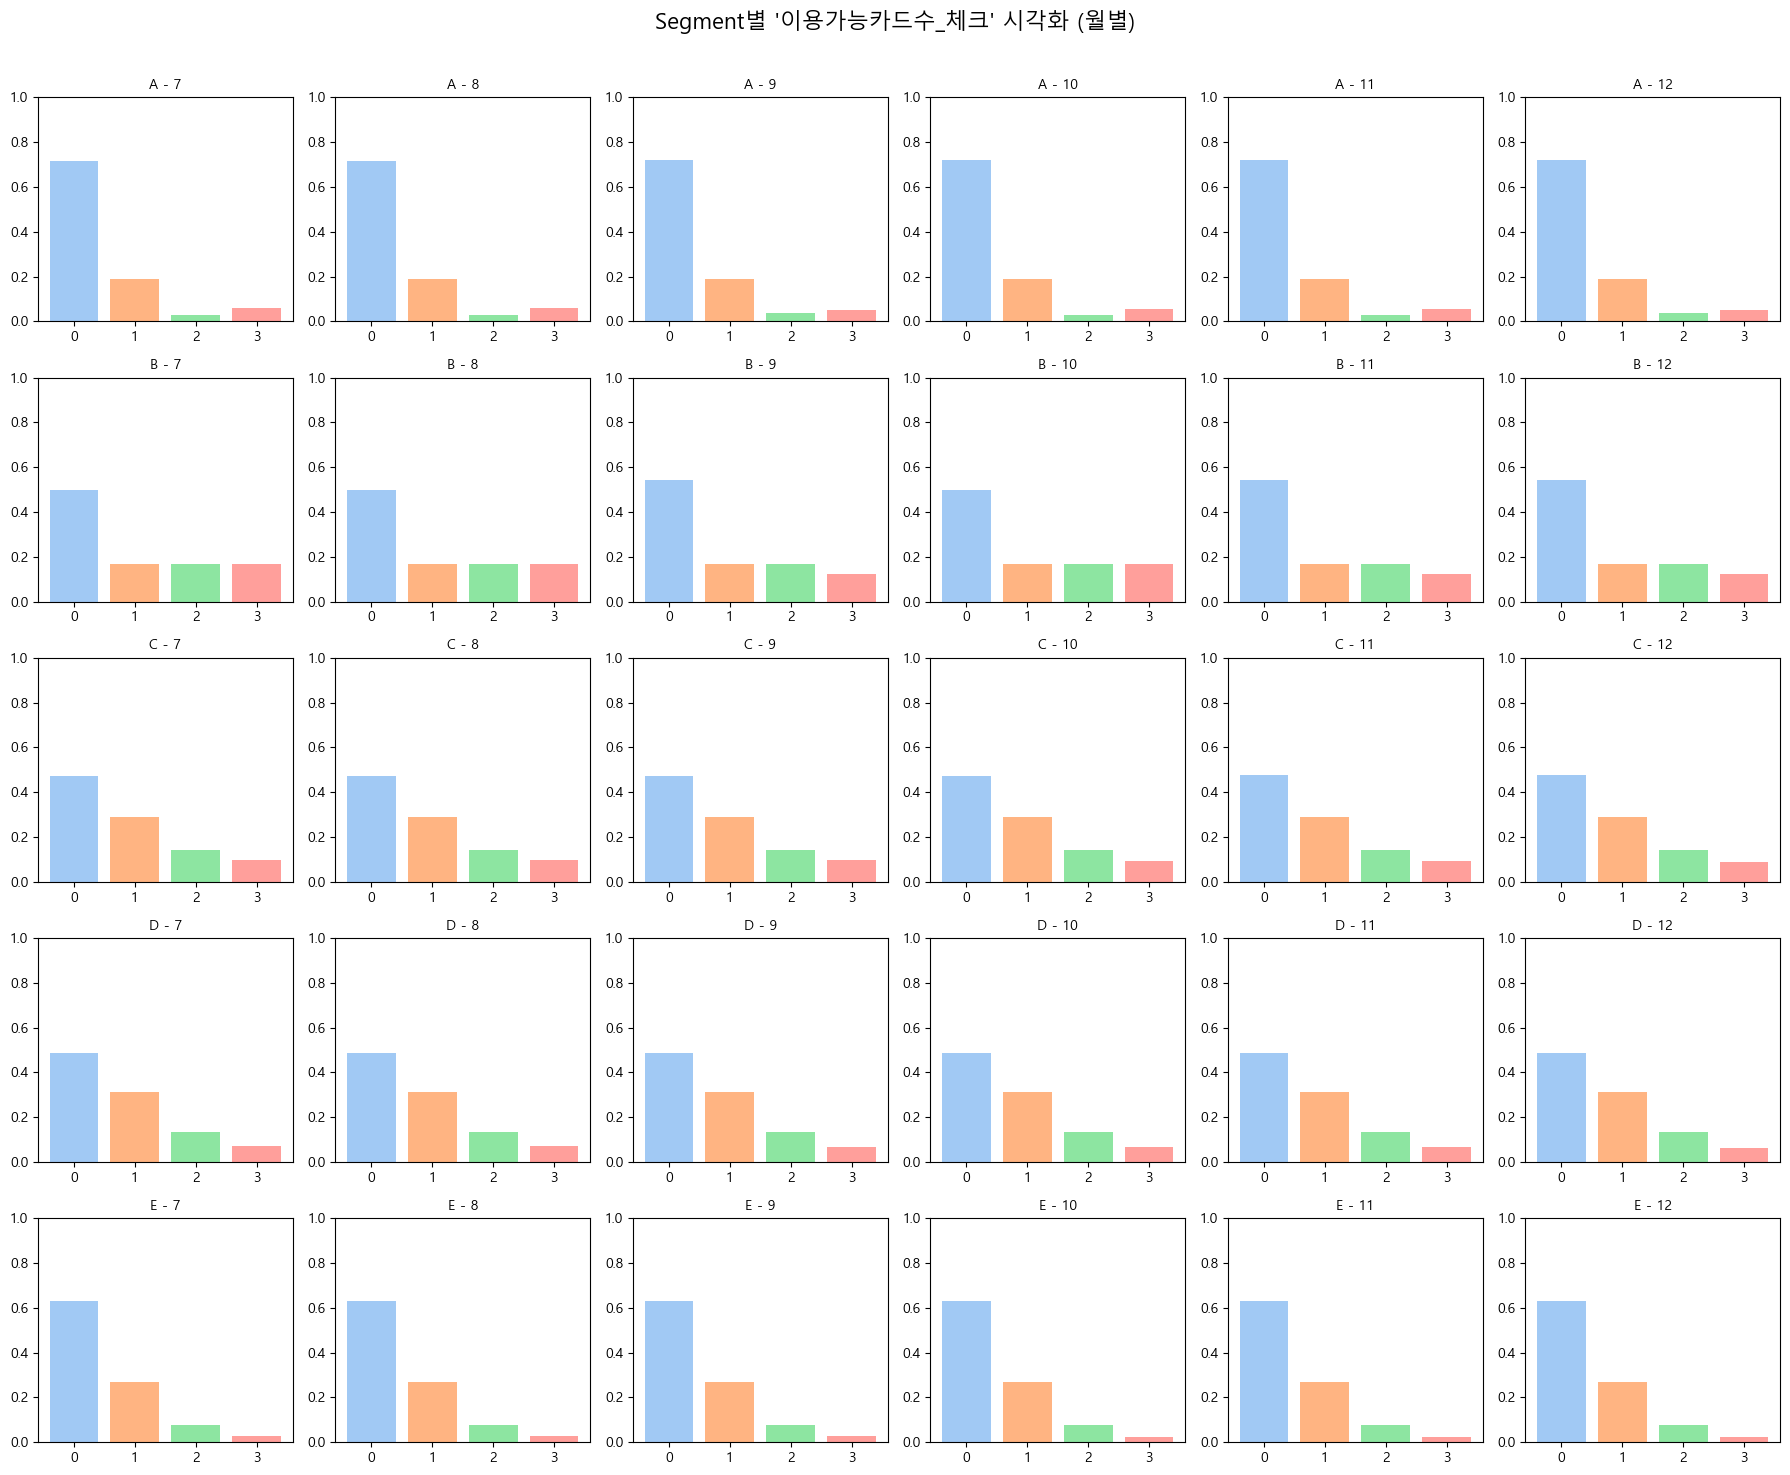

In [14]:
plot_segment_grid(dfs = customers,
                  col = "이용가능카드수_체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

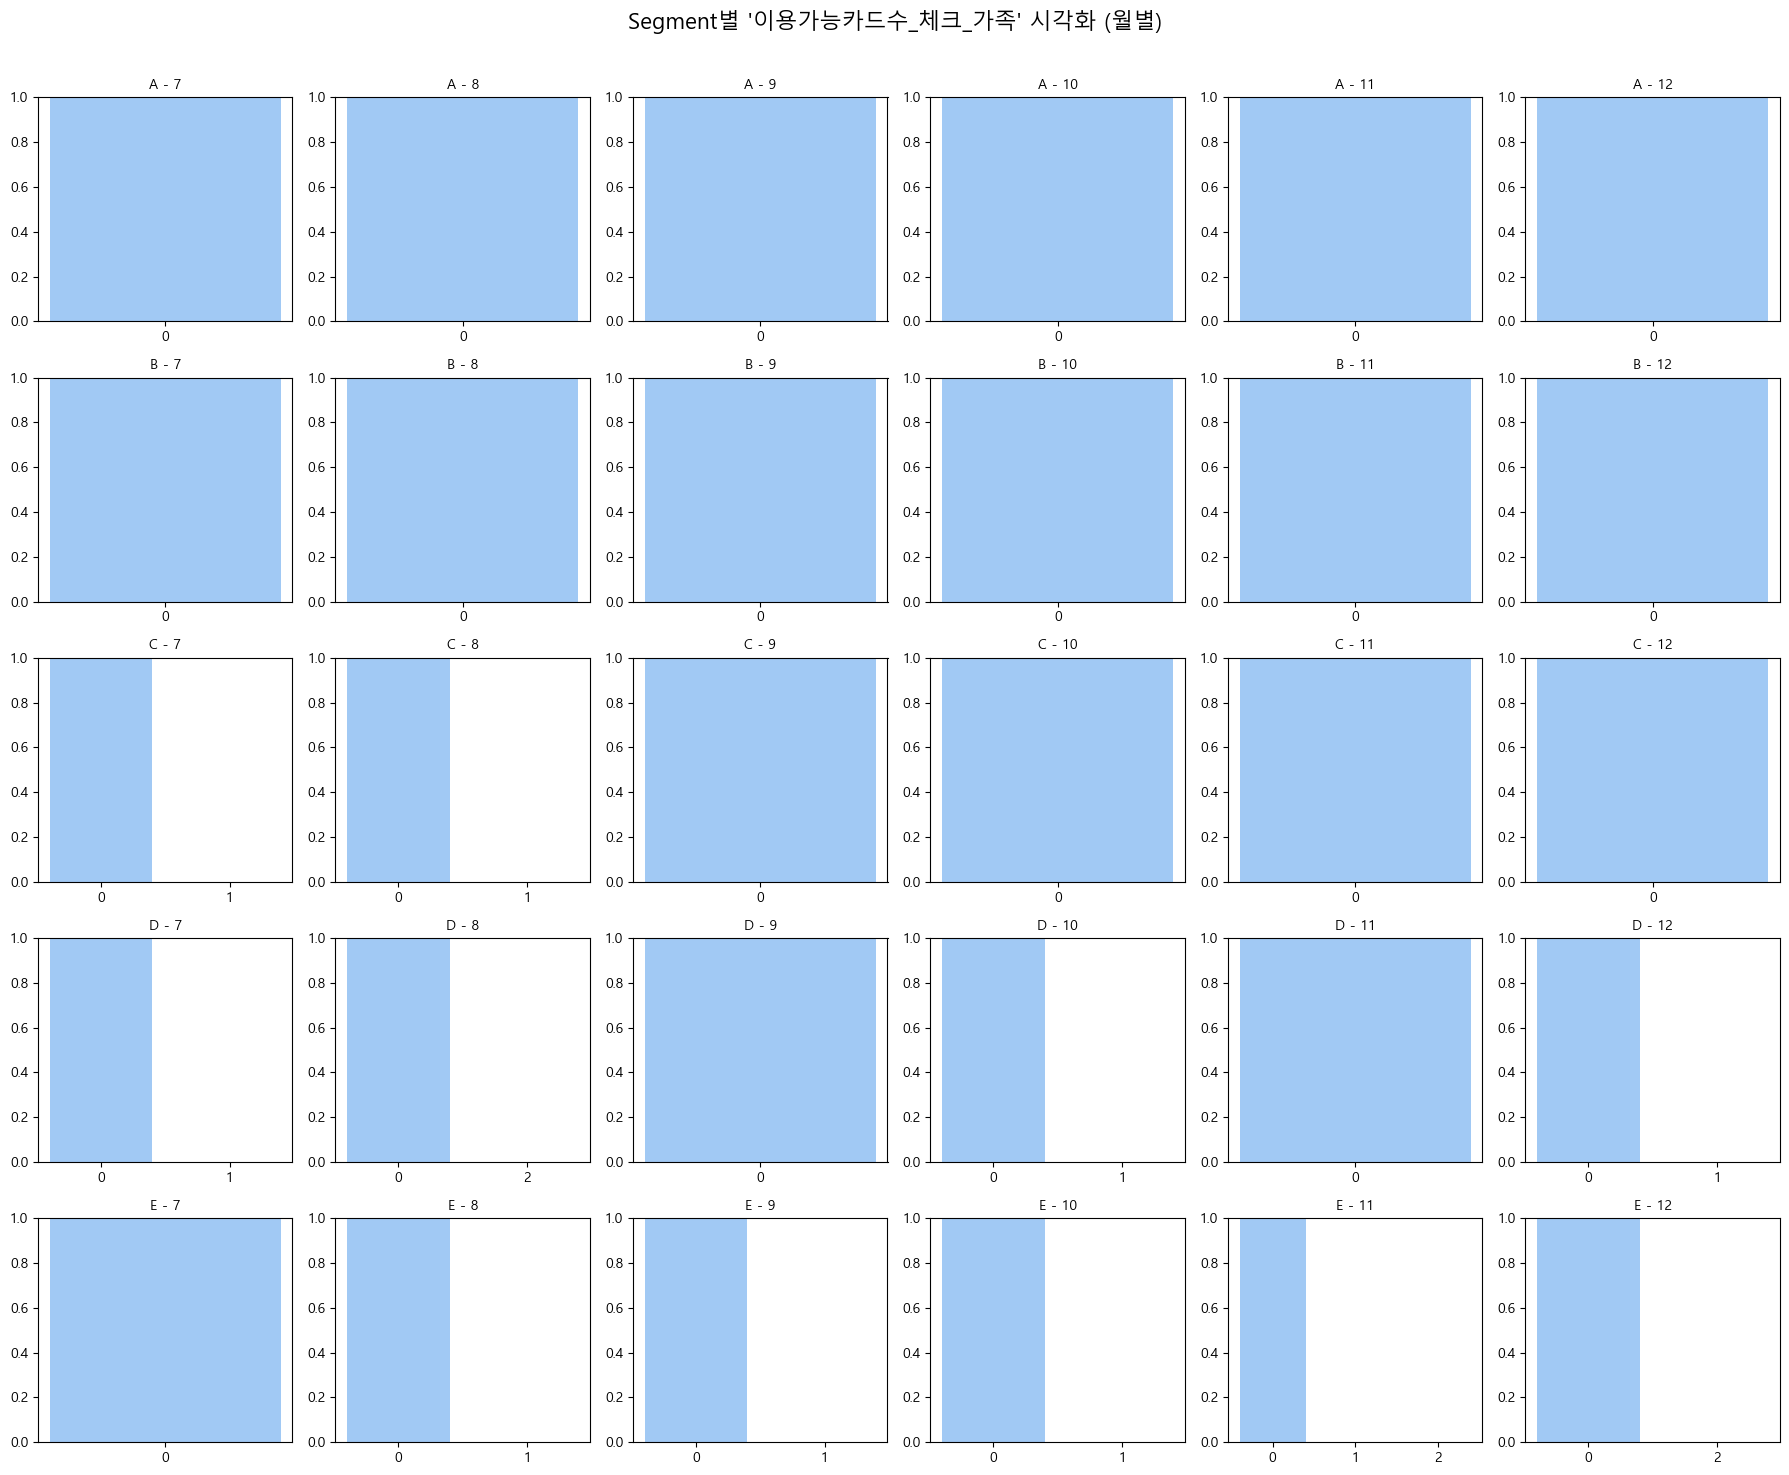

In [15]:
plot_segment_grid(dfs = customers,
                  col = "이용가능카드수_체크_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

## 이용카드수

'이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족'

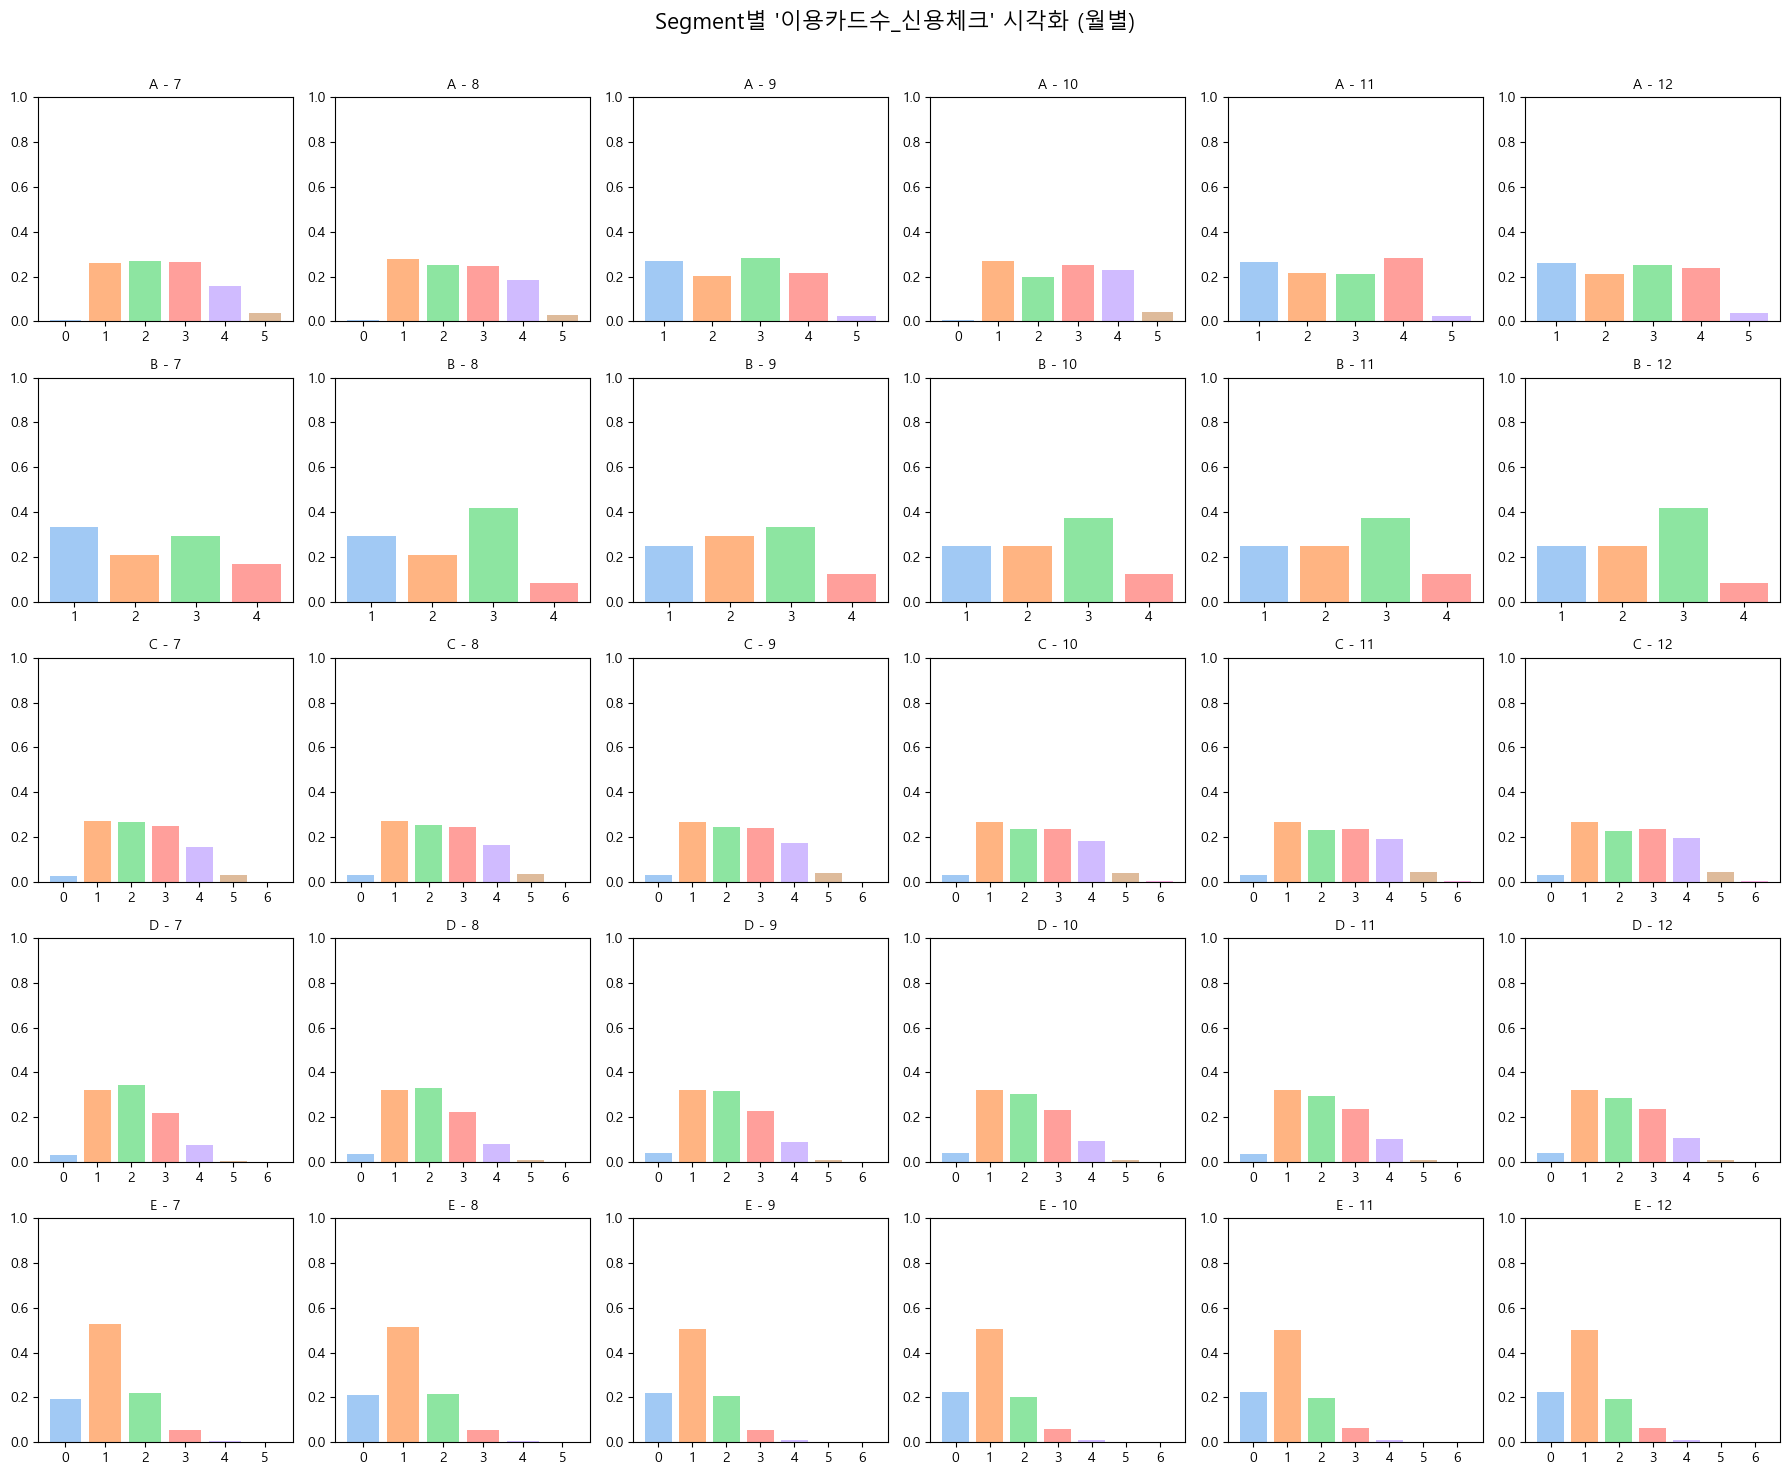

In [16]:
plot_segment_grid(dfs = customers,
                  col = "이용카드수_신용체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

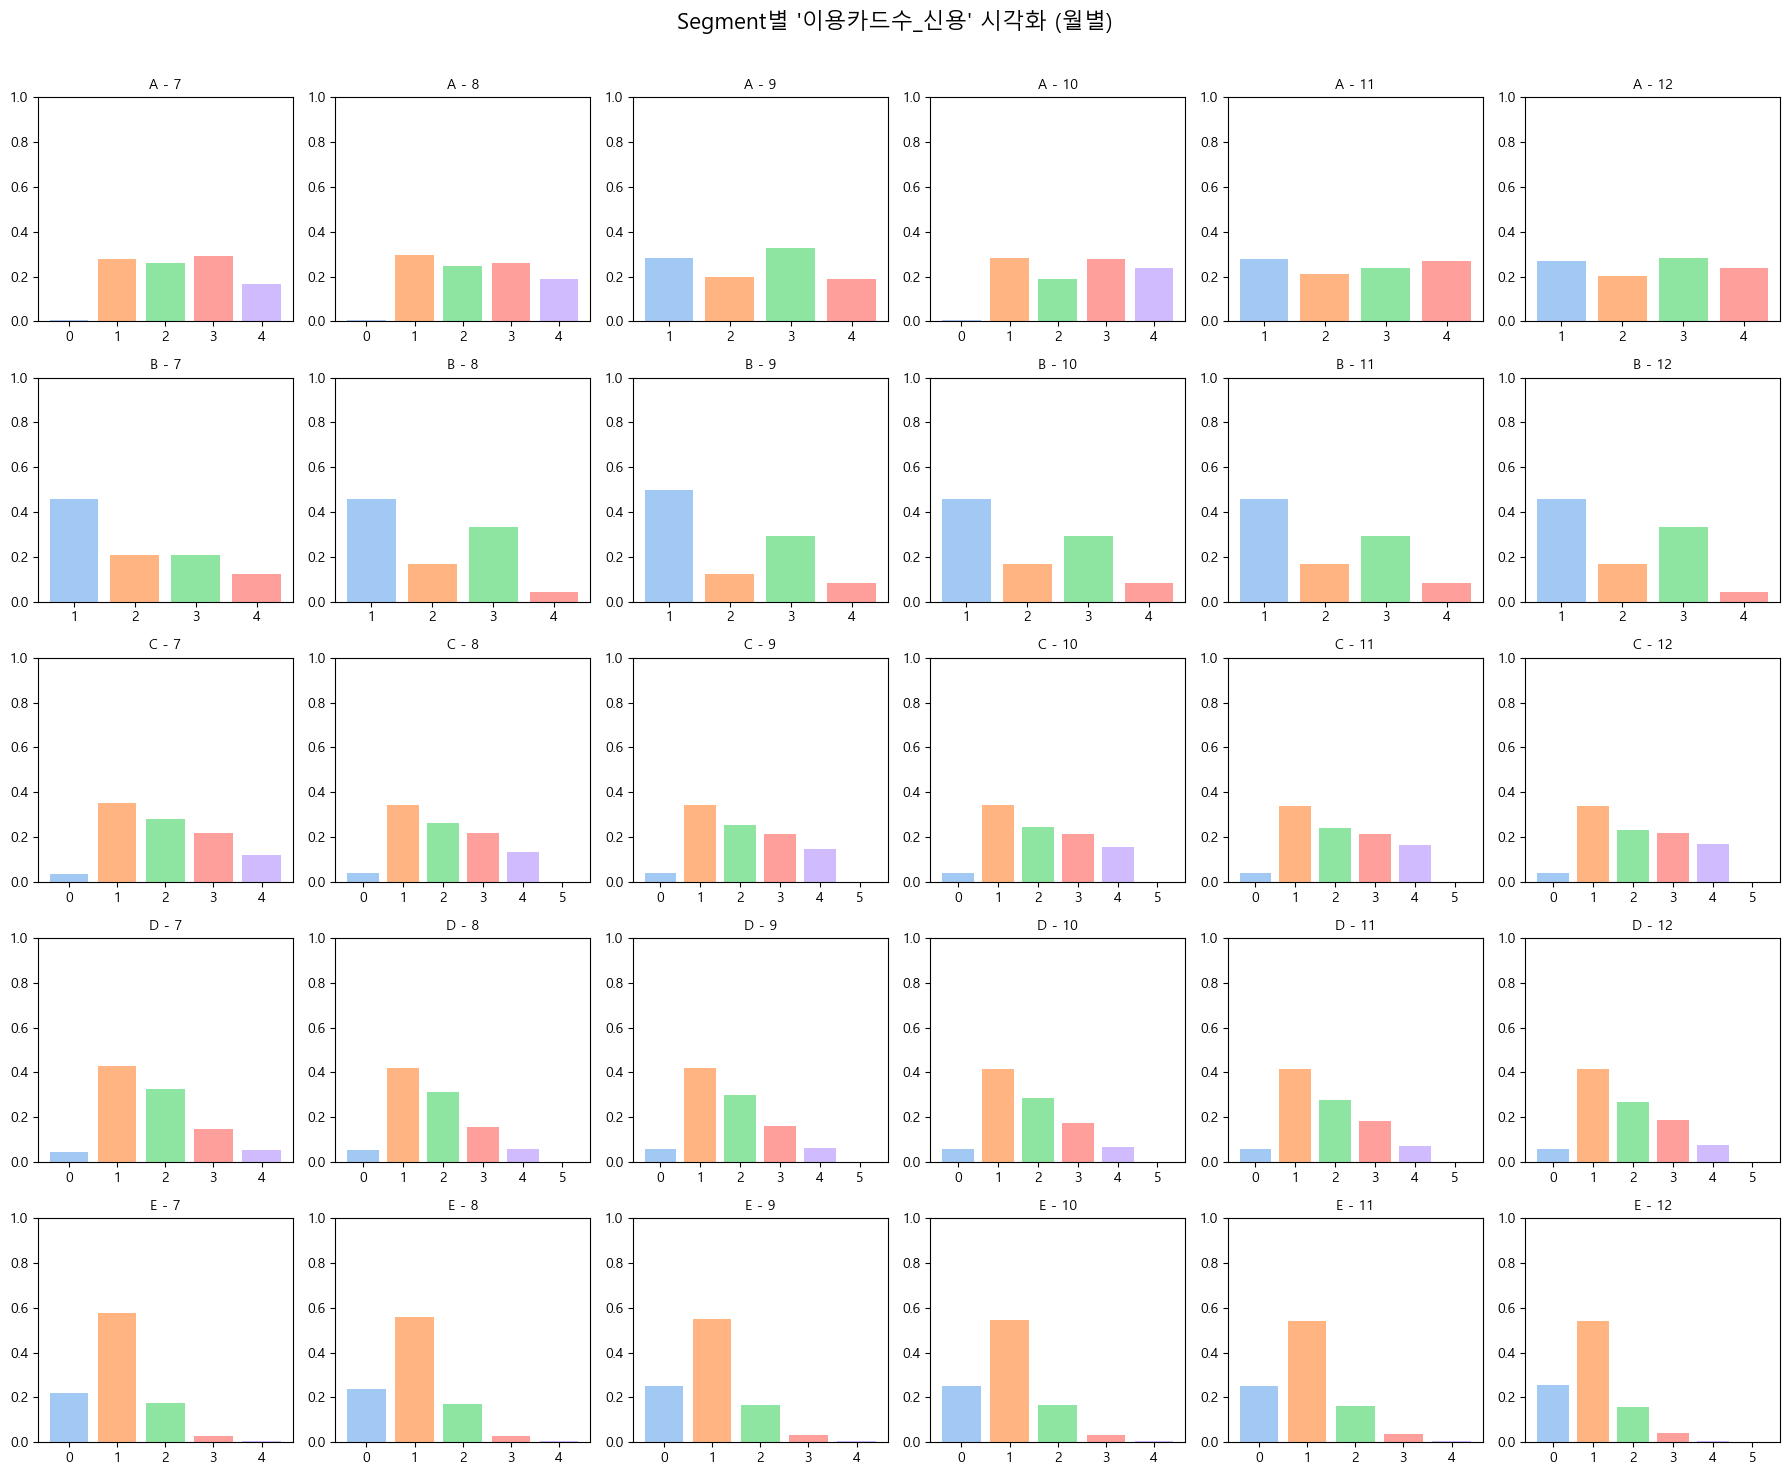

In [17]:
plot_segment_grid(dfs = customers,
                  col = "이용카드수_신용",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

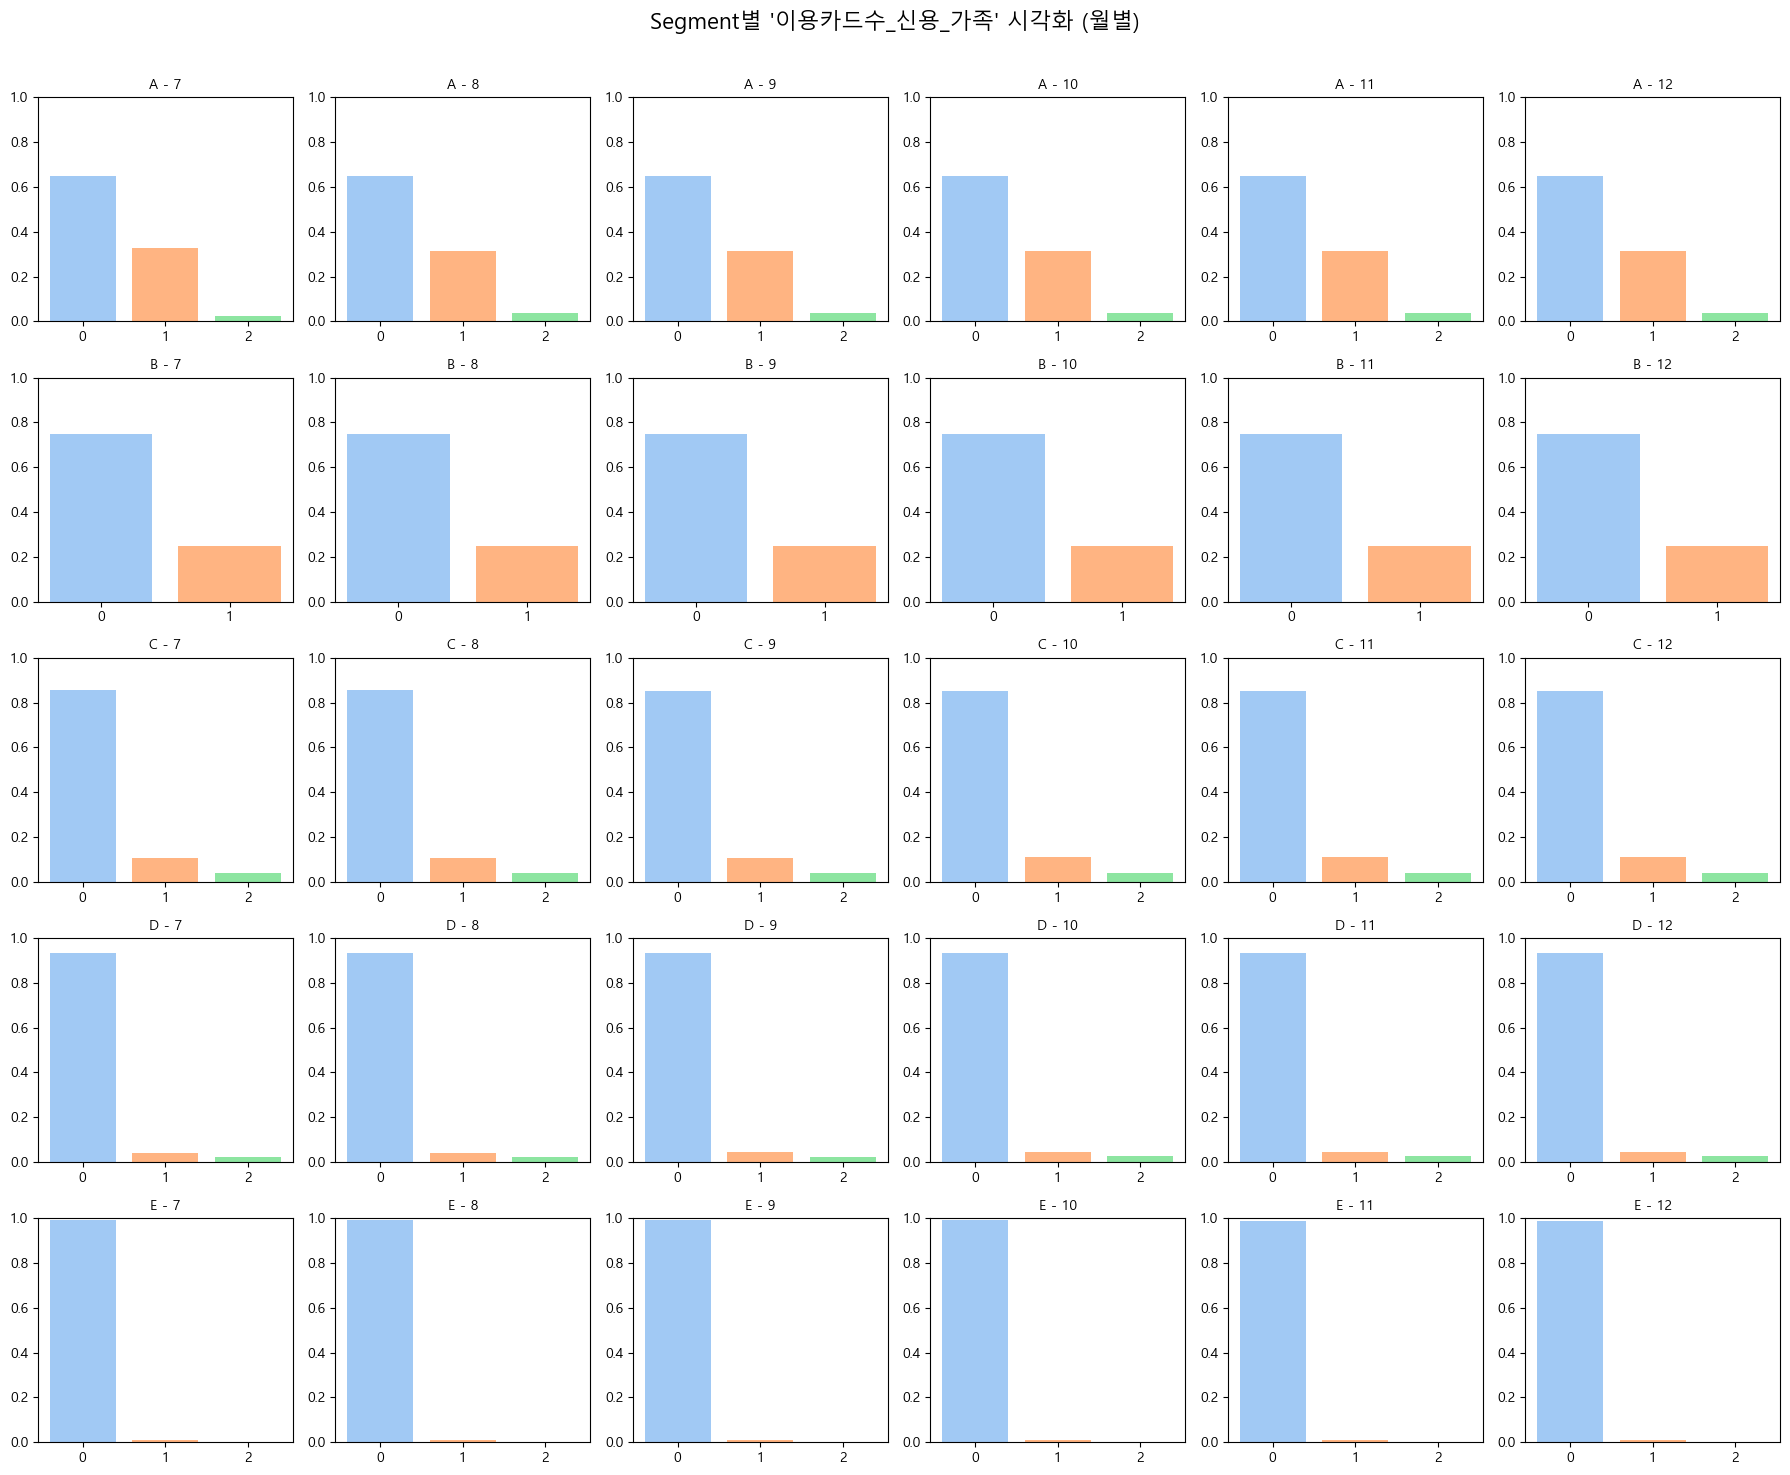

In [19]:
plot_segment_grid(dfs = customers,
                  col = "이용카드수_신용_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

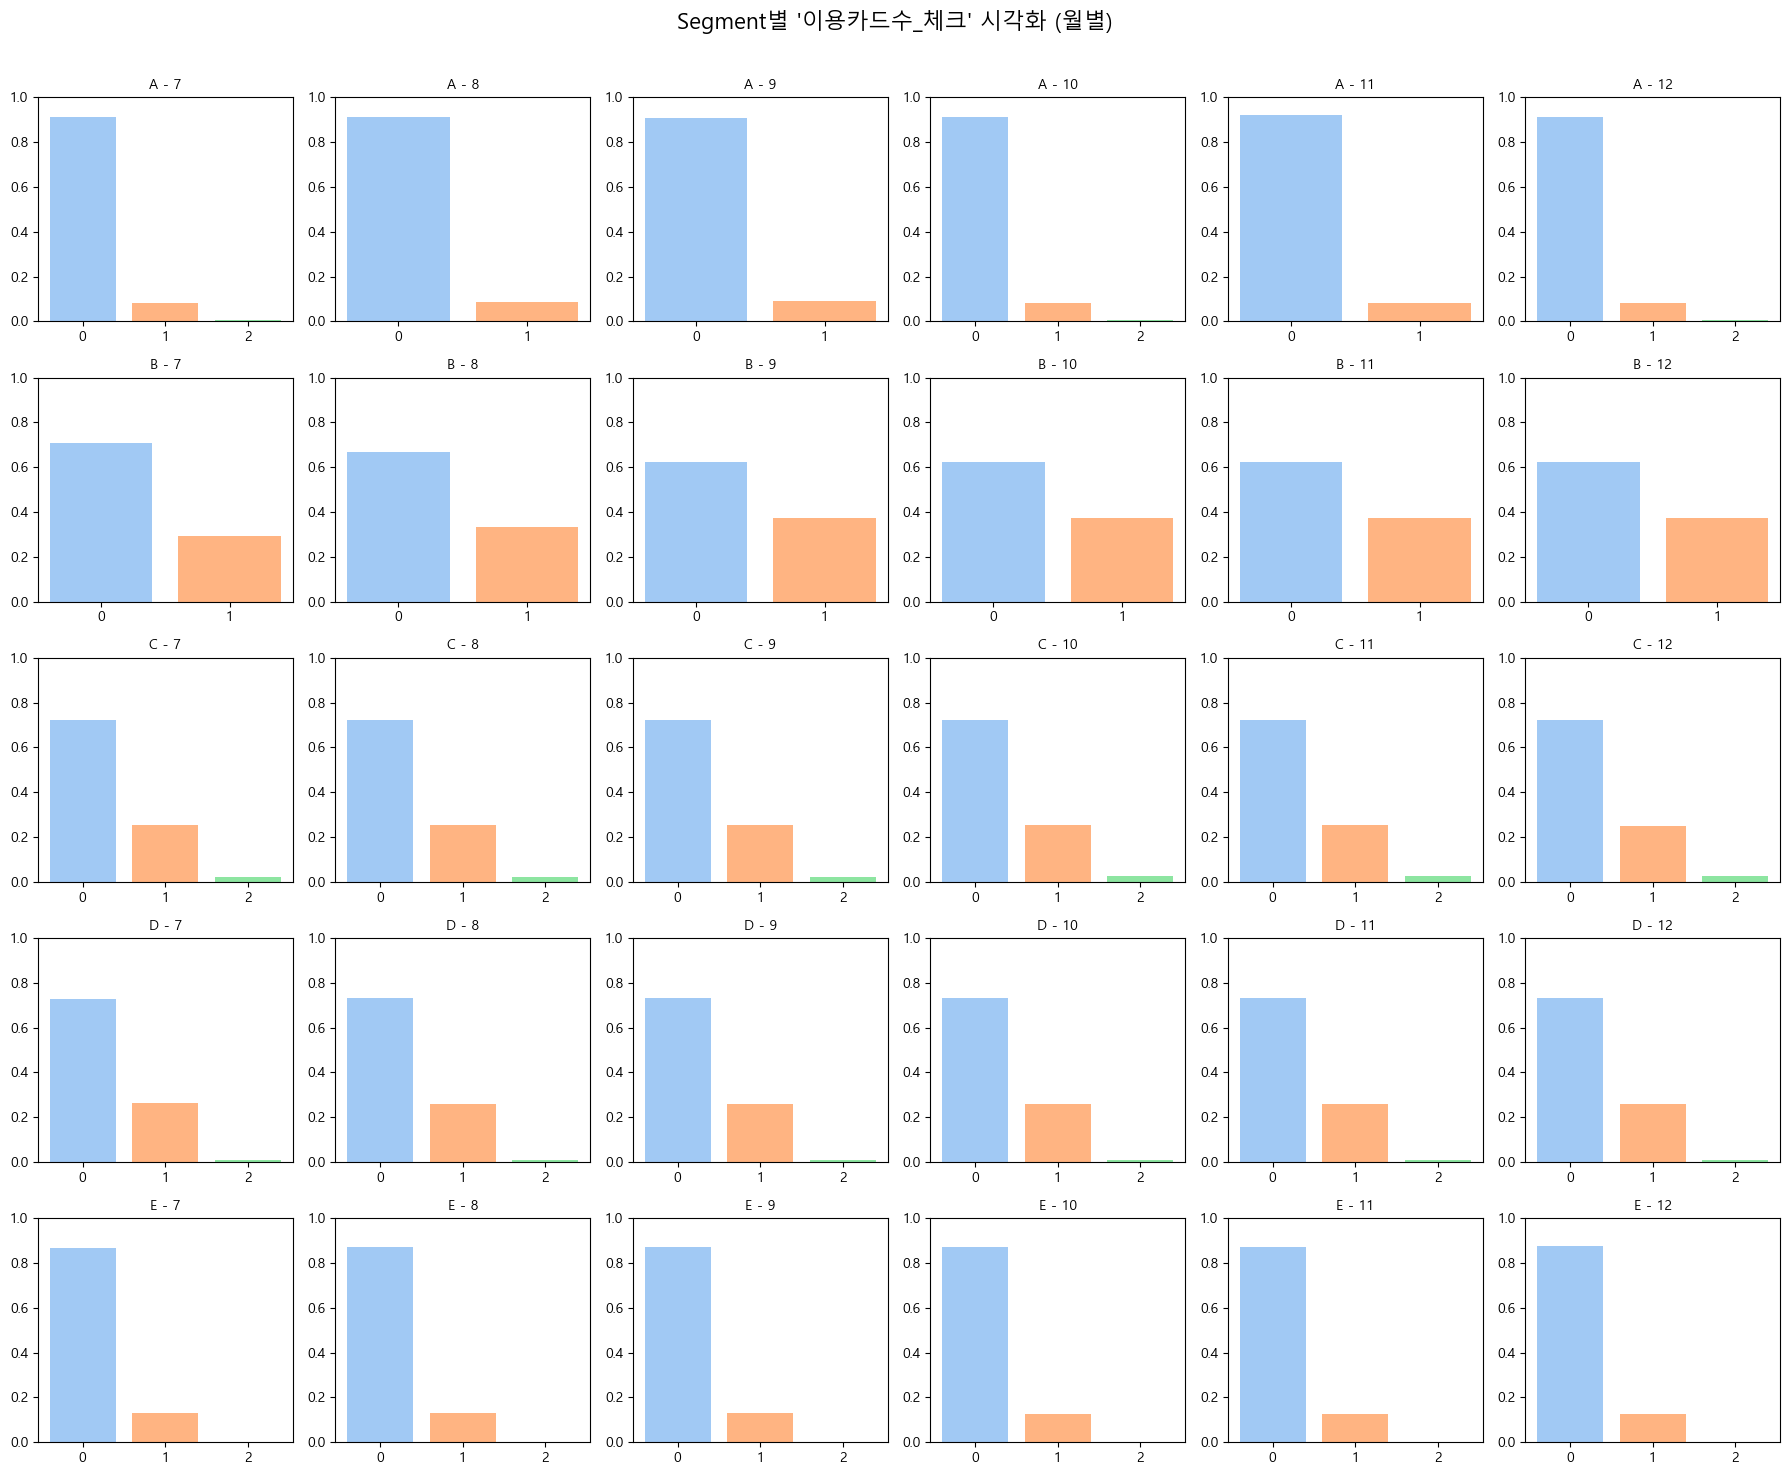

In [20]:
plot_segment_grid(dfs = customers,
                  col = "이용카드수_체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

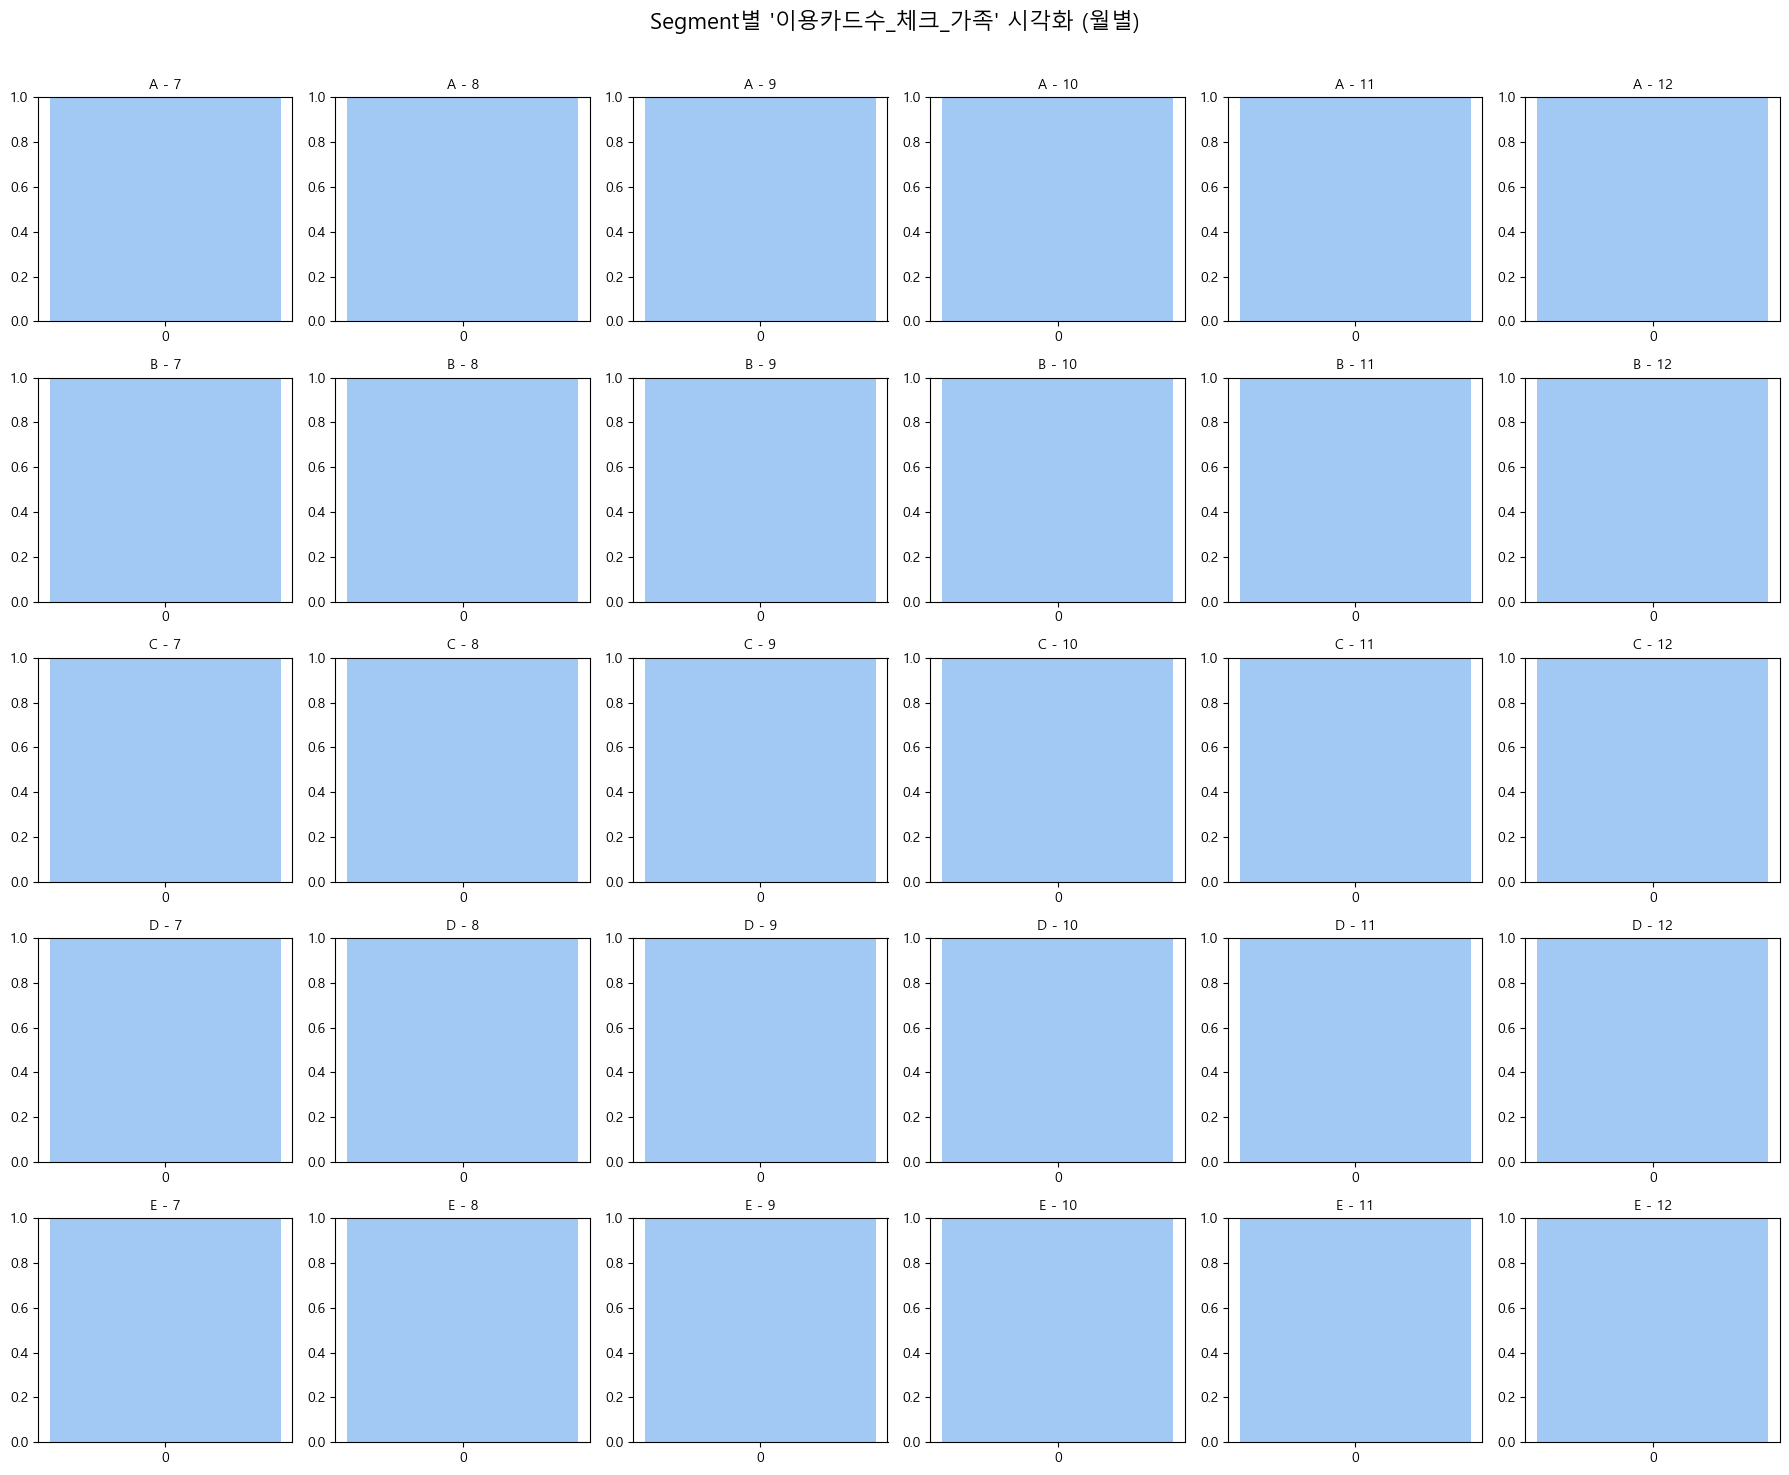

In [21]:
plot_segment_grid(dfs = customers,
                  col = "이용카드수_체크_가족",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

## 그 외 카드 관련

### 사전 요약
- `상품관련면제카드수_BOM`은 모두가 0, 아무런 의미가 없음.
- `임직원면제카드수_BOM` 역시 모두가 0
- `우수회원면제카드수_BOM` 역시 모두가 0
- `기타면제카드수_BOM` 역시 모두가 0
- `카드신청건수`는 `Segment`별로 큰 차이가 없어보임. 이 역시 변수에서 제거해도 될 듯


'상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M', '카드신청건수'

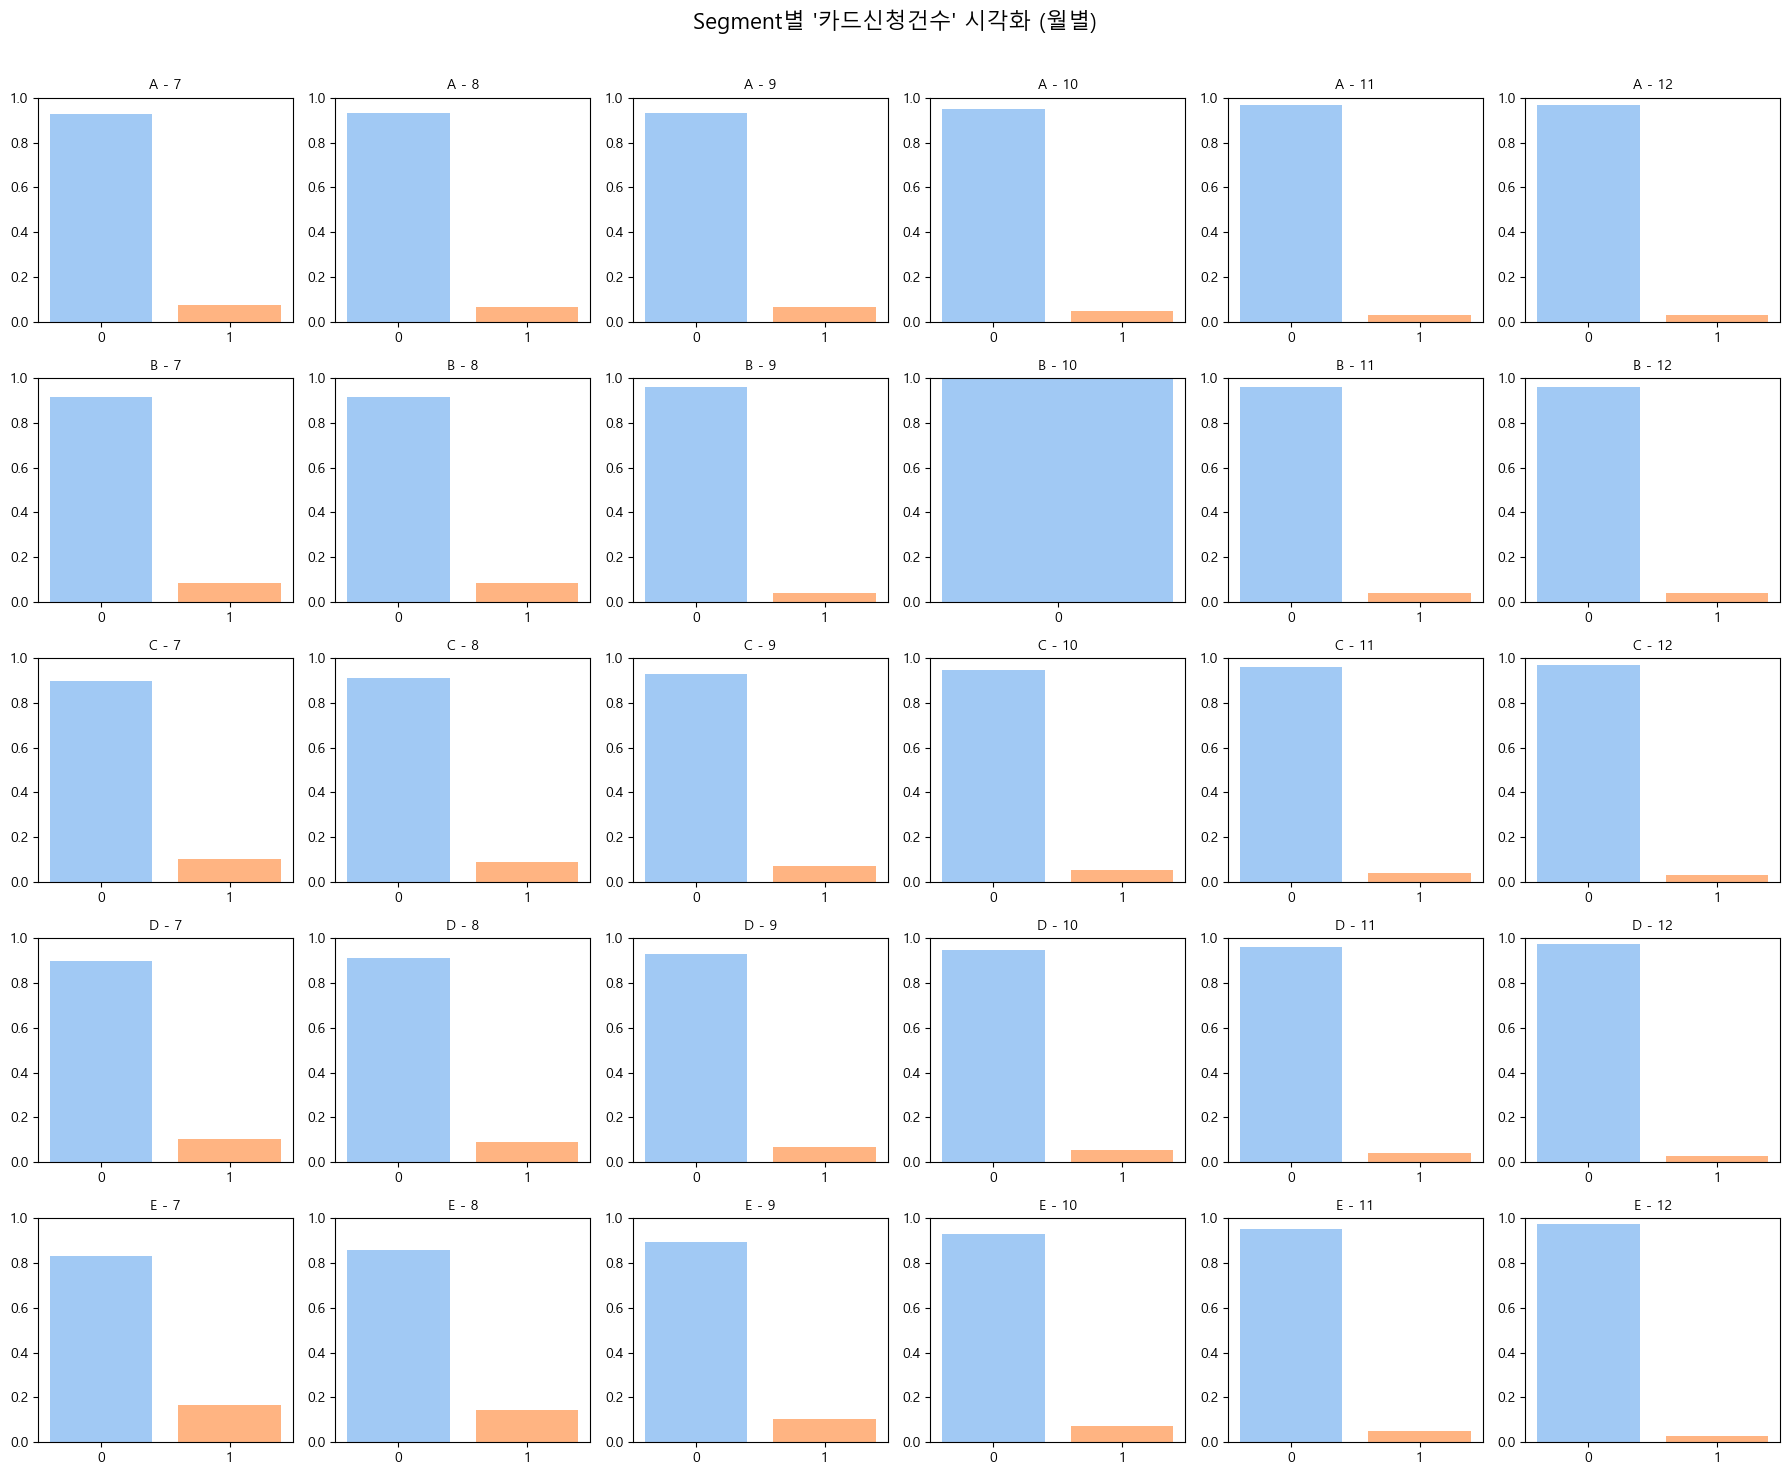

In [8]:
plot_segment_grid(dfs = customers,
                  col = "카드신청건수",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")

## (유효카드수-이용카드수)

In [11]:
for idx in range(6):
    customers[idx]["유효카드수-사용카드수"] = customers[idx]["유효카드수_신용"] - customers[idx]["이용카드수_신용"]

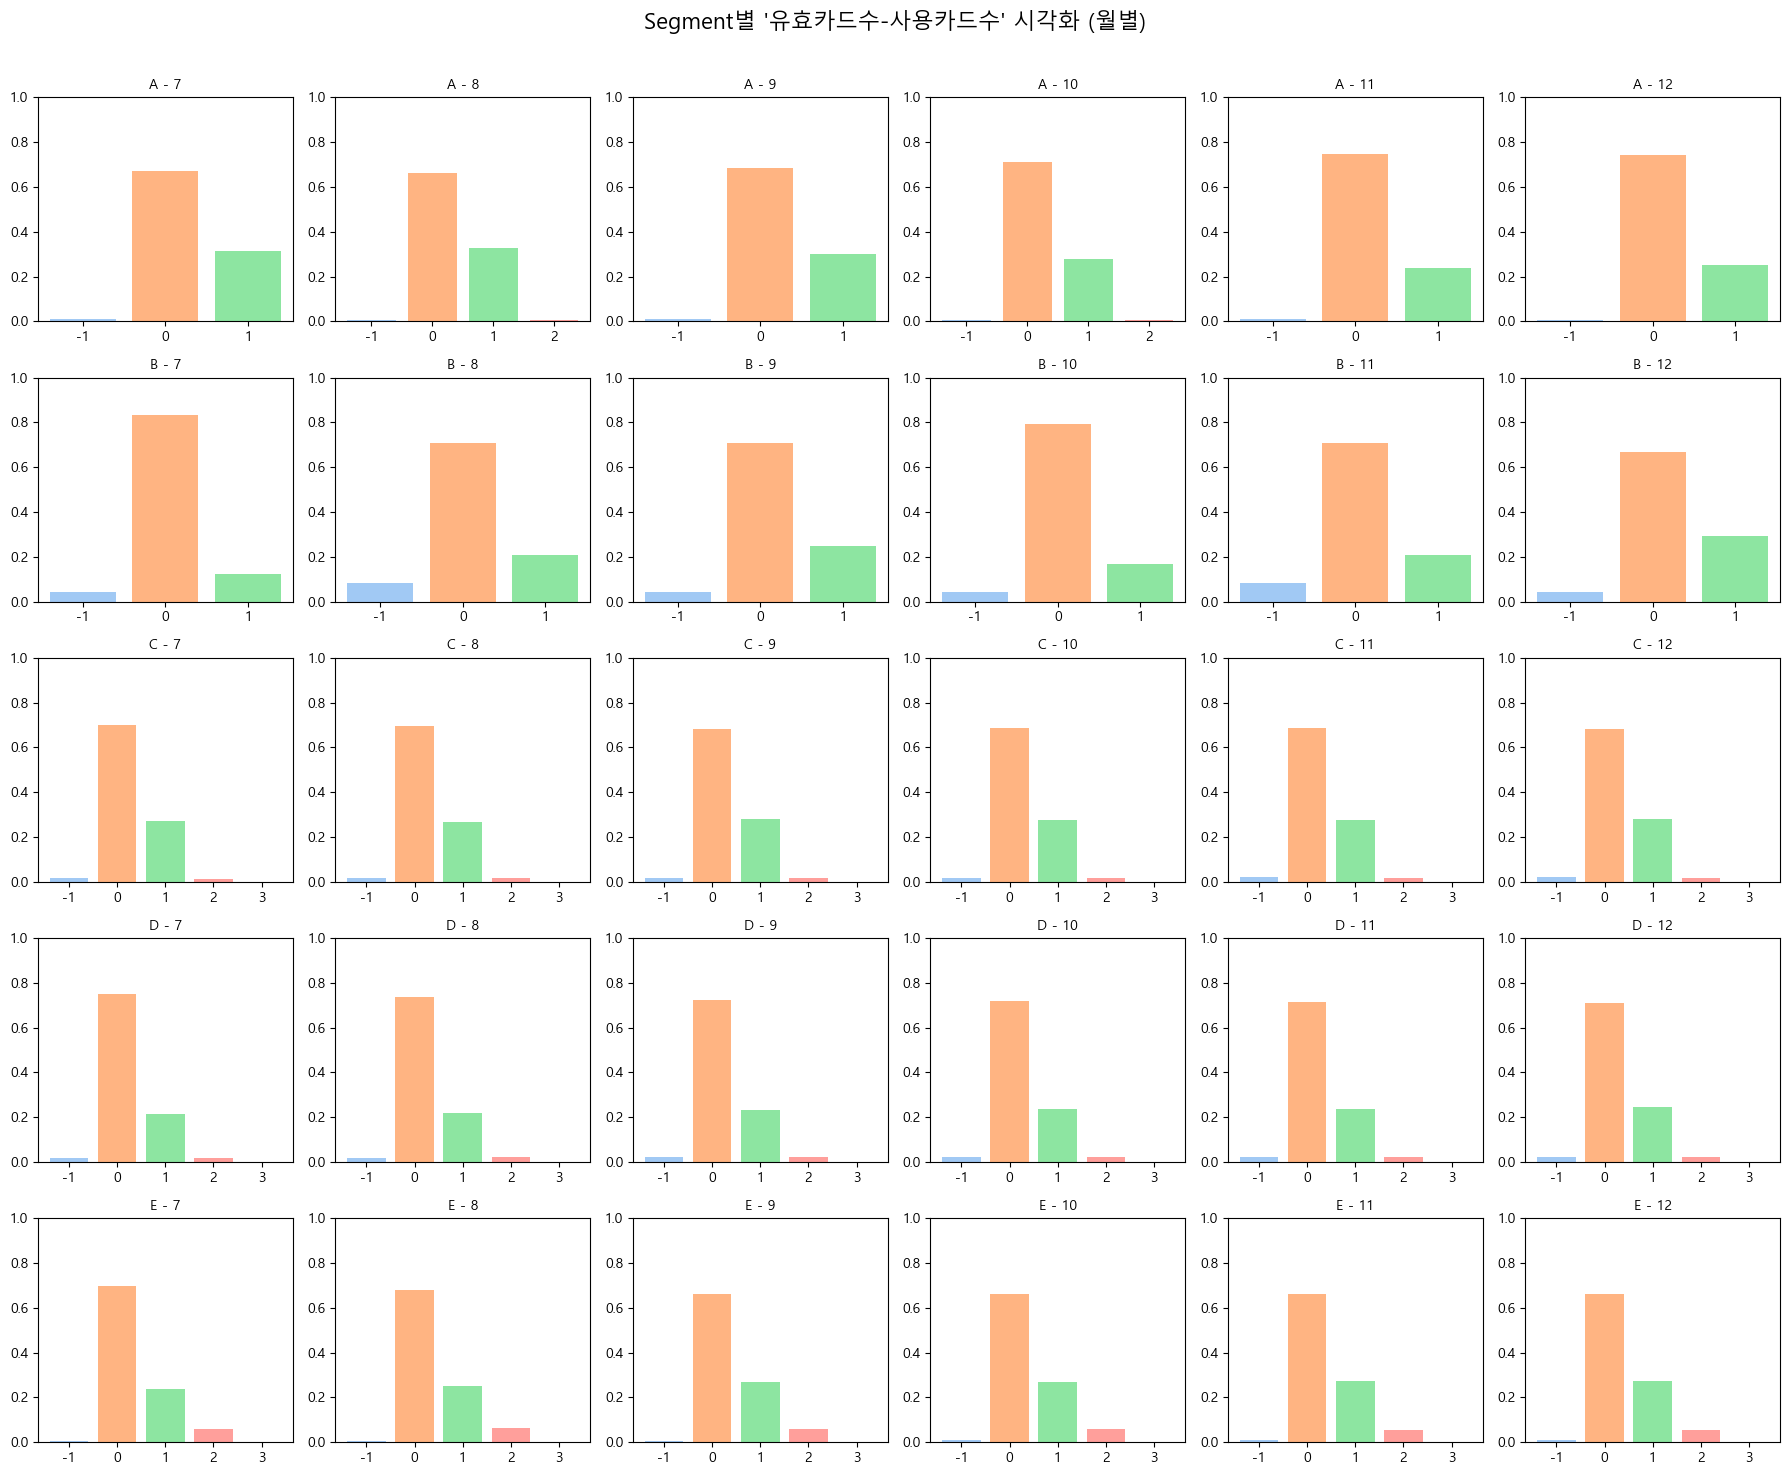

In [12]:
plot_segment_grid(dfs = customers,
                  col = "유효카드수-사용카드수",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  categorical_plot_type="bar")